In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
import pandas as pd
from scipy.signal import find_peaks
from scipy import signal

from scipy.signal import argrelextrema

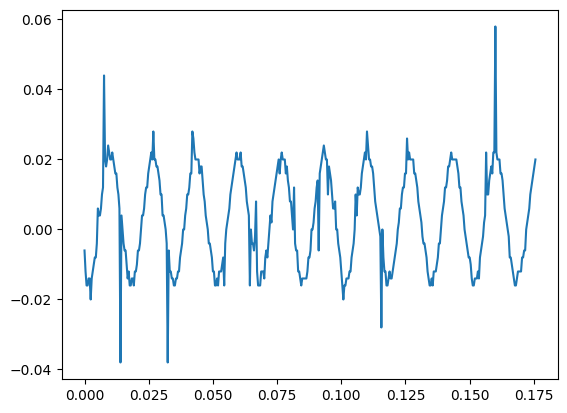

In [41]:
# Number of sample points
w = [-0.00600,-0.01200,-0.01600,-0.01600,-0.01400,-0.01400,-0.02000,-0.01400,-0.01200,-0.01000,-0.00800,-0.00800,-0.00400,0.00600,0.00400,0.00400,0.00600,0.01000,0.01200,0.04400,0.02000,0.01800,0.02000,0.02400,0.02200,0.02000,0.02000,0.02200,0.02000,0.01800,0.01600,0.01600,0.01200,0.01000,0.00600,-0.03800,0.00400,0.00,-0.00400,-0.00600,-0.00600,-0.01000,-0.01400,-0.01200,-0.01600,-0.01600,-0.01400,-0.01400,-0.01600,-0.01200,-0.01200,-0.01000,-0.00600,-0.00600,-0.00400,0.00,0.00400,0.00400,0.00600,0.01000,0.01200,0.01200,0.01600,0.01800,0.02000,0.02200,0.02000,0.02800,0.02000,0.02000,0.01800,0.01800,0.01600,0.01400,0.01000,0.01000,0.00400,0.00400,0.00200,0.00,-0.00400,-0.03800,-0.00600,-0.01200,-0.01200,-0.01400,-0.01400,-0.01600,-0.01600,-0.01400,-0.01400,-0.01200,-0.01200,-0.00800,-0.00600,-0.00400,0.00,0.00,0.00400,0.00600,0.01000,0.01000,0.01200,0.01600,0.01600,0.02800,0.02600,0.02200,0.02000,0.02000,0.02000,0.02000,0.01600,0.01800,0.01800,0.01400,0.01000,0.00800,0.00400,0.00200,0.00,-0.00400,-0.00400,-0.00600,-0.00800,-0.01200,-0.01200,-0.01600,-0.01600,-0.01400,-0.01600,-0.01200,-0.01200,-0.01200,-0.01000,-0.00800,-0.01600,-0.00400,0.00,0.00200,0.00400,0.00600,0.01000,0.01200,0.01400,0.01600,0.01800,0.02000,0.02200,0.02000,0.02000,0.02000,0.02200,0.01800,0.01800,0.01600,0.01400,0.01200,0.00800,0.00600,0.00400,-0.01600,0.00,-0.00400,-0.00400,-0.00600,-0.00200,0.00800,-0.01200,-0.01600,-0.01600,-0.01600,-0.01200,-0.01200,-0.01200,-0.01400,-0.00800,-0.00600,-0.00800,-0.00400,0.00,0.00400,0.00200,0.00800,0.01000,0.01200,0.01400,0.01600,0.01800,0.02000,0.01600,0.02000,0.02200,0.02000,0.02000,0.02000,0.01600,0.01800,0.01400,0.01200,0.00800,0.00800,0.00400,0.00,0.01200,-0.00400,-0.00600,-0.00600,-0.01200,-0.01200,-0.01400,-0.01600,-0.01400,-0.01400,-0.01400,-0.01400,-0.01400,-0.01200,-0.00800,-0.00800,-0.00600,0.00,0.00,0.00200,0.00600,0.00800,0.01200,0.01400,-0.00600,0.01600,0.01800,0.02000,0.02200,0.02400,0.02200,0.02000,0.02000,0.01000,0.01800,0.01600,0.01400,0.01000,0.00600,0.00600,0.00800,0.00,0.00,-0.00400,-0.00600,-0.00800,-0.01200,-0.01600,-0.02000,-0.01600,-0.01600,-0.01400,-0.01400,-0.01400,-0.01200,-0.01200,-0.00800,-0.00600,-0.00400,0.00,0.01000,0.00400,0.01200,0.01000,0.01000,0.01200,0.01600,0.01800,0.02000,0.02200,0.02000,0.02800,0.02400,0.02000,0.02000,0.01800,0.01800,0.01600,0.01200,0.00800,0.00600,0.00400,0.00200,0.00,-0.00200,-0.02800,0.00,-0.00800,-0.01200,-0.01200,-0.01600,-0.01600,-0.01400,-0.01200,-0.01400,-0.01400,-0.01200,-0.01000,-0.00800,-0.00600,-0.00400,0.00,0.00200,0.00600,0.00600,0.01000,0.01200,0.01200,0.01600,0.01600,0.02600,0.02000,0.02200,0.02000,0.02000,0.02000,0.02000,0.01600,0.01600,0.01400,0.01200,0.00800,0.00600,0.00400,0.00200,-0.00200,-0.00400,-0.00400,-0.00600,-0.00800,-0.01200,-0.01400,-0.01600,-0.01600,-0.01400,-0.01600,-0.01200,-0.01200,-0.01200,-0.01000,-0.00800,-0.00400,-0.00400,0.00,0.00400,0.00600,0.00800,0.01200,0.01200,0.01400,0.01800,0.01800,0.02000,0.02200,0.02000,0.02000,0.02000,0.02000,0.02000,0.01800,0.01600,0.01200,0.01200,0.00800,0.00600,0.00400,0.00,-0.00200,-0.00400,-0.00600,-0.00800,-0.00800,-0.01000,-0.01400,-0.01600,-0.01600,-0.01400,-0.01400,-0.01400,-0.01200,-0.01400,-0.00800,-0.00600,-0.00400,-0.00200,0.00200,0.00400,0.02200,0.01000,0.01000,0.01400,0.01600,0.01800,0.01600,0.02200,0.02200,0.05800,0.02200,0.02000,0.02000,0.02000,0.01600,0.01600,0.01400,0.01000,0.00600,0.00400,0.00200,0.00,-0.00200,-0.00800,-0.00800,-0.01000,-0.01200,-0.01400,-0.01600,-0.01600,-0.01400,-0.01200,-0.01200,-0.01200,-0.01200,-0.00800,-0.00800,-0.00600,-0.00600,0.00,0.00200,0.00400,0.00600,0.01000,0.01200,0.01400,0.01600,0.01800,0.02000]
N = len(w)
fs = 2500
# sample spacing
T = 1 / fs
x = np.arange(0, N/fs, T)
y = np.array(w)
plt.figure()
plt.plot(x, y)

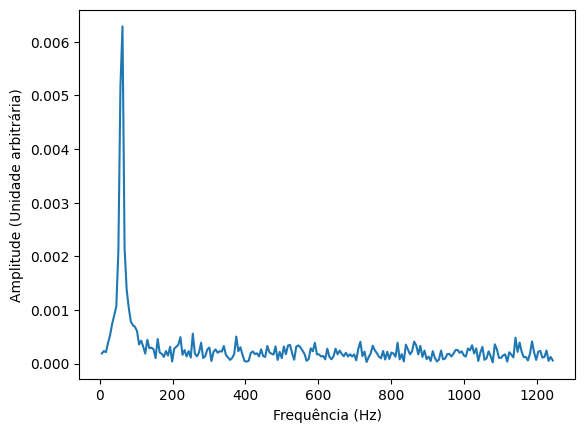

In [42]:
xf = np.fft.fftfreq(N,T)
yf = np.fft.fft(y)
yf = np.abs(yf)

yf = yf[xf>0]*1/N
xf = xf[xf>0]

plt.figure()
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (Unidade arbitrária)')
plt.plot(xf, yf)

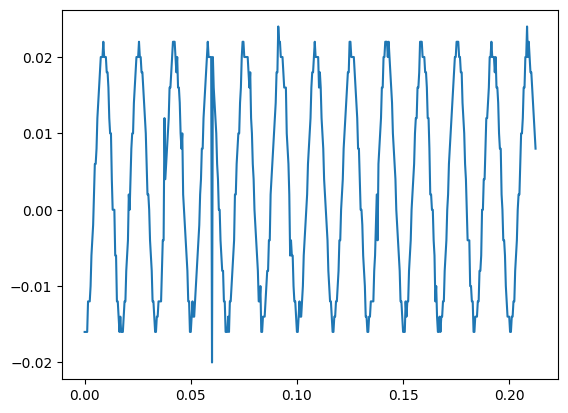

In [28]:
# Number of sample points
w = [-0.01600,-0.01600,-0.01600,-0.01600,-0.01200,-0.01200,-0.01200,-0.01000,-0.00600,-0.00400,-0.00200,0.00200,0.00600,0.00600,0.00800,0.01200,0.01400,0.01600,0.01800,0.02000,0.02000,0.02000,0.02200,0.02000,0.02000,0.02000,0.01800,0.01800,0.01600,0.01200,0.01000,0.01000,0.00400,0.00,0.00,0.00,-0.00600,-0.00600,-0.01200,-0.01200,-0.01400,-0.01600,-0.01400,-0.01600,-0.01600,-0.01600,-0.01400,-0.01200,-0.01200,-0.00800,-0.00600,-0.00400,0.00200,0.00,0.00400,0.00800,0.01000,0.01000,0.01400,0.01600,0.01800,0.02000,0.02000,0.02000,0.02200,0.02000,0.02000,0.01800,0.01800,0.01600,0.01400,0.01200,0.01000,0.00600,0.00200,0.00200,0.00,-0.00400,-0.00600,-0.00800,-0.01200,-0.01200,-0.01400,-0.01600,-0.01600,-0.01400,-0.01400,-0.01200,-0.01200,-0.01200,-0.01200,-0.00800,-0.00400,-0.00400,0.01200,0.00400,0.00600,0.00800,0.01000,0.01200,0.01600,0.01600,0.01800,0.02000,0.02200,0.02200,0.02200,0.02000,0.01800,0.02000,0.01600,0.01600,0.01400,0.01000,0.00800,0.01000,0.00200,0.00,-0.00200,-0.00400,-0.00600,-0.00800,-0.01200,-0.01200,-0.01600,-0.01600,-0.01400,-0.01200,-0.01400,-0.01400,-0.01200,-0.01000,-0.00800,-0.00600,-0.00400,-0.00200,0.00200,0.00400,0.00800,0.00800,0.01200,0.01400,0.01600,0.01800,0.02000,0.02200,0.02000,0.02000,0.02000,0.02000,-0.02000,0.02000,0.01600,0.01400,0.01200,0.01000,0.00600,0.00400,0.00,0.00,-0.00400,-0.00600,-0.00800,-0.00800,-0.01200,-0.01200,-0.01600,-0.01600,-0.01600,-0.01400,-0.01600,-0.01200,-0.01200,-0.01000,-0.00800,-0.00600,-0.00400,0.00200,0.00200,0.00600,0.00800,0.01000,0.01000,0.01400,0.01600,0.02000,0.02200,0.02200,0.02000,0.02000,0.02000,0.02000,0.02000,0.01800,0.01600,0.01800,0.01200,0.01000,0.00600,0.00400,0.00,-0.00200,-0.00400,-0.00600,-0.00800,-0.01200,-0.01200,-0.01000,-0.01600,-0.01600,-0.01400,-0.01400,-0.01400,-0.01200,-0.01000,-0.00800,-0.00800,-0.00400,-0.00400,0.00200,0.00400,0.00600,0.00800,0.01000,0.01200,0.01400,0.01800,0.01800,0.02400,0.02200,0.02200,0.02000,0.02000,0.02000,0.01800,0.01600,0.01600,0.01600,0.01000,0.00800,0.00600,0.00200,-0.00600,-0.00400,-0.00600,-0.00600,-0.01000,-0.01200,-0.01200,-0.01400,-0.01600,-0.01600,-0.01400,-0.01200,-0.01400,-0.01400,-0.01200,-0.01000,-0.00600,-0.00400,-0.00200,0.00,0.00200,0.00600,0.00800,0.01000,0.01200,0.01600,0.01800,0.01800,0.02000,0.02200,0.02000,0.02000,0.02000,0.02000,0.01600,0.01800,0.01600,0.01200,0.01000,0.00800,0.00400,0.00200,0.00,-0.00200,-0.00400,-0.00800,-0.01000,-0.01200,-0.01200,-0.01400,-0.01600,-0.01600,-0.01400,-0.01400,-0.01200,-0.01200,-0.01000,-0.00800,-0.00400,-0.00400,0.00,0.00200,0.00400,0.00800,0.01000,0.01200,0.01400,0.01600,0.01800,0.01800,0.02200,0.02200,0.02000,0.02000,0.02000,0.02000,0.01800,0.01600,0.01400,0.01200,0.00800,0.00800,0.00400,0.00,0.00,-0.00200,-0.00600,-0.00800,-0.01000,-0.01400,-0.01400,-0.01600,-0.01600,-0.01400,-0.01400,-0.01200,-0.01200,-0.01200,-0.01200,-0.00800,-0.00600,-0.00200,0.00200,-0.00400,0.00600,0.00800,0.01000,0.01200,0.01600,0.01600,0.02000,0.02000,0.02200,0.02200,0.02200,0.02000,0.02200,0.02000,0.01800,0.01600,0.01400,0.01000,0.00800,0.00600,0.00400,0.00,-0.00200,-0.00400,-0.00600,-0.00800,-0.01200,-0.01200,-0.01400,-0.01600,-0.01600,-0.01600,-0.01200,-0.01400,-0.01200,-0.01200,-0.00800,-0.00600,-0.00400,0.00,0.00200,0.00400,0.00600,0.01000,0.01200,0.01200,0.01600,0.01600,0.01800,0.02200,0.02200,0.02200,0.02000,0.02000,0.02000,0.01800,0.01800,0.01600,0.01200,0.01200,0.00800,0.00200,0.00200,0.00,0.00,-0.00400,-0.00600,-0.01200,-0.01000,-0.01400,-0.01600,-0.01600,-0.01400,-0.01600,-0.01400,-0.01400,-0.01200,-0.01200,-0.00800,-0.00600,-0.00400,0.00,0.00200,0.00600,0.00800,0.01000,0.01200,0.01400,0.01600,0.01800,0.02000,0.02000,0.02200,0.02200,0.02200,0.02000,0.02000,0.01800,0.01800,0.01400,0.01200,0.01000,0.00600,0.00400,0.00,-0.00400,-0.00400,-0.00400,-0.01000,-0.01000,-0.01200,-0.01200,-0.01600,-0.01600,-0.01400,-0.01400,-0.01400,-0.01200,-0.01200,-0.00800,-0.00800,-0.00600,0.00,0.00,0.00400,0.00400,0.00800,0.01200,0.01200,0.01400,0.01600,0.02000,0.02000,0.02200,0.02000,0.02000,0.02000,0.01800,0.02000,0.01600,0.01600,0.01400,0.01000,0.00800,0.00800,0.00200,0.00,-0.00400,-0.00400,-0.00600,-0.01000,-0.01200,-0.01400,-0.01400,-0.01400,-0.01600,-0.01600,-0.01400,-0.01400,-0.01200,-0.01200,-0.00800,-0.00600,-0.00400,0.00,0.00200,0.00200,0.00600,0.01000,0.01000,0.01200,0.01600,0.01600,0.02000,0.02000,0.02400,0.02000,0.02200,0.02000,0.01800,0.01800,0.01600,0.01400,0.01200,0.01000,0.00800]
N = len(w)
fs = 2500
# sample spacing
T = 1 / fs
x = np.arange(0, N/fs, T)
y = np.array(w)
plt.figure()
plt.plot(x, y)

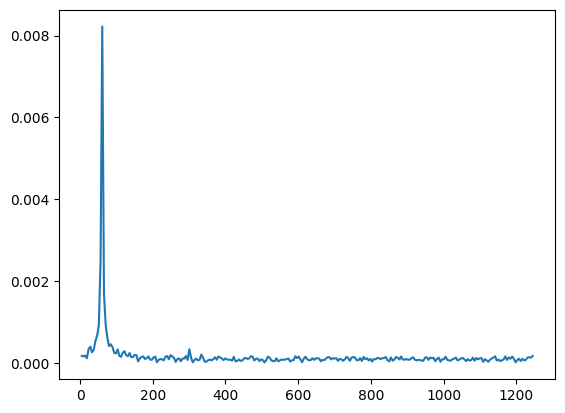

In [29]:
xf = np.fft.fftfreq(N,T)
yf = np.fft.fft(y)
yf = np.abs(yf)

yf = yf[xf>0]*1/N
xf = xf[xf>0]

plt.figure()
plt.plot(xf, yf)

In [ ]:
xf

array([   4.94071146,    9.88142292,   14.82213439,   19.76284585,
         24.70355731,   29.64426877,   34.58498024,   39.5256917 ,
         44.46640316,   49.40711462,   54.34782609,   59.28853755,
         64.22924901,   69.16996047,   74.11067194,   79.0513834 ,
         83.99209486,   88.93280632,   93.87351779,   98.81422925,
        103.75494071,  108.69565217,  113.63636364,  118.5770751 ,
        123.51778656,  128.45849802,  133.39920949,  138.33992095,
        143.28063241,  148.22134387,  153.16205534,  158.1027668 ,
        163.04347826,  167.98418972,  172.92490119,  177.86561265,
        182.80632411,  187.74703557,  192.68774704,  197.6284585 ,
        202.56916996,  207.50988142,  212.45059289,  217.39130435,
        222.33201581,  227.27272727,  232.21343874,  237.1541502 ,
        242.09486166,  247.03557312,  251.97628458,  256.91699605,
        261.85770751,  266.79841897,  271.73913043,  276.6798419 ,
        281.62055336,  286.56126482,  291.50197628,  296.44268

In [ ]:
yf

array([2.03977251e-04, 1.51853677e-04, 2.32692572e-04, 7.57872474e-05,
       5.64358960e-04, 3.43204407e-04, 5.54497647e-05, 2.39552796e-04,
       2.81455554e-04, 2.39020336e-04, 2.89261111e-04, 1.77107166e-03,
       7.08272837e-04, 4.36639959e-04, 1.19666884e-04, 1.74660172e-04,
       1.01312577e-04, 8.75634758e-05, 1.84386377e-04, 1.43646897e-04,
       3.06727489e-04, 3.91870809e-04, 2.92079978e-04, 5.93837524e-05,
       4.04923980e-04, 3.47269178e-04, 6.19682075e-05, 2.64157042e-04,
       2.24856025e-04, 2.75111038e-04, 1.81399222e-04, 4.53609870e-04,
       1.38117068e-04, 1.08429810e-04, 2.78397770e-04, 8.90265853e-04,
       8.99073931e-04, 1.32076932e-04, 2.71318416e-04, 1.77706884e-05,
       4.81317553e-04, 2.71144803e-04, 2.78147577e-04, 1.16524515e-04,
       2.45469719e-04, 3.21172080e-04, 2.75034927e-04, 1.48954601e-04,
       5.01122576e-04, 2.12086131e-04, 3.19062957e-04, 2.83965708e-04,
       1.57846620e-04, 6.10126390e-05, 3.96977344e-05, 3.42432137e-04,
      

In [ ]:
max_ind = argrelextrema(yf, np.greater)
max_ind

(array([  2,   4,   8,  11,  15,  18,  21,  24,  27,  29,  31,  36,  38,
         40,  42,  45,  48,  50,  56,  60,  62,  65,  69,  72,  76,  79,
         82,  84,  88,  92,  96,  99, 102, 104, 106, 108, 110, 114, 118,
        120, 123, 126, 128, 131, 133, 135, 140, 144, 147, 150, 153, 156,
        160, 164, 167, 170, 172, 174, 177, 182, 184, 186, 188, 191, 197,
        200, 205, 209, 211, 215, 218, 220, 224, 226, 229, 232, 237, 241,
        243, 245, 248]),)

In [ ]:
pxf = xf[max_ind]
pxf

array([  14.82213439,   24.70355731,   44.46640316,   59.28853755,
         79.0513834 ,   93.87351779,  108.69565217,  123.51778656,
        138.33992095,  148.22134387,  158.1027668 ,  182.80632411,
        192.68774704,  202.56916996,  212.45059289,  227.27272727,
        242.09486166,  251.97628458,  281.62055336,  301.38339921,
        311.26482213,  326.08695652,  345.84980237,  360.67193676,
        380.43478261,  395.256917  ,  410.07905138,  419.96047431,
        439.72332016,  459.48616601,  479.24901186,  494.07114625,
        508.89328063,  518.77470356,  528.65612648,  538.53754941,
        548.41897233,  568.18181818,  587.94466403,  597.82608696,
        612.64822134,  627.47035573,  637.35177866,  652.17391304,
        662.05533597,  671.93675889,  696.64031621,  716.40316206,
        731.22529644,  746.04743083,  760.86956522,  775.6916996 ,
        795.45454545,  815.2173913 ,  830.03952569,  844.86166008,
        854.743083  ,  864.62450593,  879.44664032,  904.15019

In [ ]:
pyf = yf[max_ind]
pyf

array([0.00023269, 0.00056436, 0.00028146, 0.00177107, 0.00017466,
       0.00018439, 0.00039187, 0.00040492, 0.00026416, 0.00027511,
       0.00045361, 0.00089907, 0.00027132, 0.00048132, 0.00027815,
       0.00032117, 0.00050112, 0.00031906, 0.00060306, 0.0009246 ,
       0.00032481, 0.0003728 , 0.00021977, 0.00022673, 0.00039016,
       0.00028038, 0.00048055, 0.00088722, 0.00022882, 0.00050665,
       0.00028007, 0.00042972, 0.00045877, 0.00033227, 0.00034479,
       0.00035922, 0.00022065, 0.00035798, 0.00032396, 0.0003347 ,
       0.00021427, 0.00033968, 0.00027234, 0.00034115, 0.00025612,
       0.00023921, 0.00062346, 0.00024983, 0.00018275, 0.00037444,
       0.00031334, 0.0004276 , 0.00028704, 0.00024052, 0.00034809,
       0.0002462 , 0.0001967 , 0.00024164, 0.00045565, 0.00042496,
       0.00015526, 0.00016584, 0.0004522 , 0.00029593, 0.0004559 ,
       0.00035594, 0.00036375, 0.00032418, 0.00028883, 0.00049457,
       0.00048287, 0.00035791, 0.00051809, 0.00033895, 0.00039

In [ ]:
np.around(pxf/60)

array([ 0.,  0.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,
        3.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  7.,
        7.,  7.,  7.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9., 10.,
       10., 10., 10., 11., 11., 11., 11., 12., 12., 12., 12., 13., 13.,
       13., 14., 14., 14., 14., 14., 15., 15., 15., 15., 16., 16., 16.,
       17., 17., 17., 17., 18., 18., 18., 19., 19., 19., 19., 20., 20.,
       20., 20., 21.])

In [ ]:
ampH = np.zeros(20)
for freq, amp in zip(pxf, pyf):
  i = int(np.around(freq/60))
  if(i <= 20):
    ampH[i-1] = amp
ampH

array([0.00017466, 0.00027511, 0.00048132, 0.00031906, 0.0003728 ,
       0.00039016, 0.00022882, 0.00045877, 0.00035798, 0.00033968,
       0.00023921, 0.00037444, 0.00028704, 0.00024164, 0.00016584,
       0.0004559 , 0.00028883, 0.00035791, 0.00032908, 0.00026737])

<Axes: xlabel='Freq'>

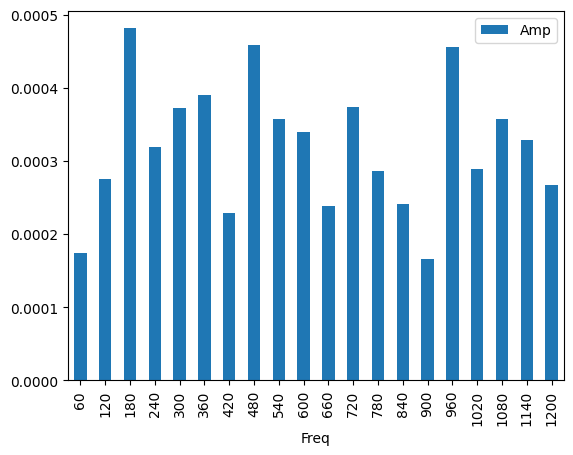

In [ ]:
df = pd.DataFrame({
    'Freq': [60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900, 960, 1020, 1080, 1140, 1200],
    'Amp': ampH
})
df.plot(x="Freq", y="Amp", kind="bar")

In [ ]:
w =[0.00200,0.00,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.01600,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,-0.05000,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00400,0.00,0.00200,0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.01200,0.01200,0.01400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.03800,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01200,0.00600,0.00400,0.01000,0.01200,0.01200,0.01600,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,-0.03800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00600,0.00200,0.01200,0.01400,0.01200,0.01400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.01400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.03600,0.00400,-0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.05200,0.00600,0.00400,0.00600,0.00600,0.01200,0.01200,0.01200,0.00200,0.00600,0.00200,0.00600,0.00,0.00400,0.00200,0.00800,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,-0.00200,-0.00600,-0.03200,-0.00600,-0.01800,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00800,0.01200,0.00400,0.00200,0.01000,0.01200,0.01200,0.01600,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00400,-0.00800,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.01000,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00800,0.00400,0.00400,0.00600,0.00400,0.00600,0.00200,0.00400,0.00400,0.01200,0.01200,0.01200,0.01400,0.00,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00600,-0.00400,-0.00400,-0.00400,0.02200,0.00600,0.01600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.00600,0.01200,0.01400,0.01200,0.00600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.02000,0.00400,0.01200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.03800,0.01000,0.01200,0.01200,0.01400,0.00200,0.00400,0.00400,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.01000,-0.01600,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.01600,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.01600,0.01200,0.01600,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.01600,0.01400,0.00,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,0.01000,0.01000,0.01200,0.00800,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00,0.00200,0.00400,0.00,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00600,0.00200,0.00600,0.00600,-0.02000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.02000,0.01000,0.02000,0.01600,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00,-0.00400,0.01000,0.00200,0.00200,0.00200,0.00600,-0.00400,-0.00600,-0.00400,-0.00600,0.00600,0.00400,0.00400,0.00400,0.00200,0.01400,-0.03400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01600,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.01000,0.01000,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.01800,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.01600,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00400,0.00,0.00400,0.00200,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.01200,0.01000,0.00800,0.01400,0.00400,0.00200,0.00200,0.00600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.01800,-0.02800,-0.02600,0.00,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00600,0.01200,0.01600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00600,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.05600,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00,-0.00400,-0.00400,-0.00600,0.00200,0.00600,0.00400,0.00800,0.00400,0.00800,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,-0.00200,0.02200,0.01400,0.01200,0.01400,0.00400,0.00600,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,-0.01000,-0.00800,0.00,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00200,0.01000,0.01400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.02400,0.01200,0.01200,0.01400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.03800,0.00200,0.00200,0.00400,0.00400,0.00400,0.00,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00200,-0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.00800,0.01400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00400,0.01000,0.00,0.00200,0.00200,0.00,-0.00600,-0.00400,-0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,-0.01000,0.01200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,-0.02200,0.00,0.00200,0.00800,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,-0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01000,0.01000,0.01000,0.01600,0.00800,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01400,0.01200,-0.01400,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00400,0.00400,0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.01400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01400,0.01200,0.00400,0.00200,0.00400,-0.01000,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00600,0.00400,0.00200,0.00200,0.00200,-0.00400,0.00200,0.03600,0.00200,0.00400,0.00,0.00200,0.00,0.00,0.00200,0.00400,0.08800,0.00,-0.01200,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01000,0.01200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,-0.00400,-0.02000,-0.00600,-0.01600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.02600,0.00400,0.00400,0.00400,0.01400,0.01400,0.01200,0.00400,0.00200,0.00400,0.00,0.00200,0.00400,0.00,0.00400,0.00,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00600,-0.03400,0.00,-0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.01400,0.00400,0.00600,0.01000,0.00400,0.01000,0.01400,0.01200,0.01400,0.00400,0.00200,0.00400,0.00,0.00200,0.00200,0.00,0.00400,0.00200,0.03800,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00200,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00200,0.01200,0.01400,0.01200,0.01600,0.00400,0.00400,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00200,0.00200,-0.01400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00200,0.01200,0.01200,0.01200,0.01000,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00,-0.07000,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00400,-0.00600,0.00,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.01000,0.05400,0.01400,0.01600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.01600,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,-0.02400,0.00600,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.01000,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00800,0.01400,0.00200,0.00200,0.00,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.03200,0.01200,0.01000,0.01000,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.00400,-0.00200,0.01000,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00600,0.00200,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01400,0.01200,0.01400,0.00800,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00600,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00,0.00200,0.00400,0.00400,0.00400,-0.02600,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00600,0.00800,0.00,-0.00400,-0.00600,-0.00200,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.05400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.01000,0.01400,0.01200,0.01200,0.00200,0.05400,0.00400,-0.00200,0.00400,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.04800,0.00,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00800,0.01200,0.01200,0.01400,0.00200,0.00200,0.00200,-0.01400,0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00600,-0.00400,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00800,0.01800,0.00400,0.00200,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00400,0.00200,0.00400,0.00400,0.00,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.01800,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.04800,0.00400,0.00400,0.00400,0.00200,0.01200,0.01200,0.01200,0.01200,0.00200,0.00,0.00400,0.00,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00,0.00400,0.00200,0.01400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.01200,0.01200,0.01200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.02600,0.01000,0.01400,0.01400,0.01600,0.00200,0.00200,0.00600,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01200,0.01800,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00,-0.00600,-0.00600,-0.00600,-0.00400,0.00600,0.00200,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00800,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.01200,0.01200,0.01400,0.00400,0.00200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,-0.08400,0.00400,0.00,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00200,0.00400,0.00400,0.00200,0.00600,0.00400,-0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,-0.00600,-0.00400,-0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00200,0.00600,0.00400,0.00400,0.00400,0.01200,0.01600,0.01000,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.01600,-0.00200,-0.06000,-0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00,0.02600,0.00400,0.00200,0.00600,0.01200,0.01400,0.01200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00,0.00400,0.00400,-0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00800,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,-0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00400,0.00,-0.00200,-0.00800,-0.00400,-0.00400,0.00400,0.00400,0.00400,0.00,0.00600,0.03400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.01000,-0.01200,0.01000,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00,0.00200,0.00,0.00200,0.00400,0.00400,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,-0.05200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00,0.00,0.00400,0.00,0.00,-0.00800,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.01400,0.01200,0.01400,0.00200,0.00200,0.00400,0.00600,-0.01600,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00600,0.00200,-0.01000,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.00400,0.00400,-0.00400,-0.01000,0.00200,-0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,-0.00400,-0.00600,-0.00600,-0.01600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00600,0.00200,0.00400,0.00600,0.01200,0.01200,0.01200,0.01000,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,-0.00400,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.01400,-0.02000,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02200,0.00200,0.01200,0.01400,0.01200,0.01400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00,0.00,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00800,0.00,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.02600,0.00800,0.06600,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,-0.03200,0.01400,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,-0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01400,0.01200,-0.00200,0.00400,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.09200,0.00400,0.00400,0.00,-0.00400,-0.00400,-0.00600,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.01800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01600,0.01400,0.01200,0.00200,0.00200,0.00200,0.00600,0.00,-0.00600,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00400,0.00,0.00,-0.01200,-0.00600,-0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.03400,0.00600,0.00800,0.00400,0.00400,0.00400,0.01200,0.01400,0.01200,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00400,-0.01400,0.00400,0.00,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.02200,0.00400,0.00400,0.01200,0.01400,0.01200,0.01200,0.00200,0.00200,0.01000,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.01000,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,-0.00600,-0.00400,-0.00400,-0.00200,0.00200,0.00400,0.00400,0.00200,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.04000,0.00600,0.00600,0.01400,0.01200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00400,0.00,0.00400,0.00400,0.00,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.01000,0.00400,0.00400,0.00400,0.00200,0.00400,0.01200,0.01400,0.01200,0.01600,-0.00600,0.00,0.00800,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00400,0.00,0.00200,0.00200,-0.02000,-0.02600,0.00200,0.00,-0.00400,-0.00400,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.02000,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.01200,0.01400,0.01200,0.01000,0.00200,0.00200,0.00200,0.00200,0.00200,0.01400,0.00200,0.00200,0.00200,0.00,0.00,0.00400,0.00200,0.00400,0.00200,0.00400,-0.07000,-0.00200,0.01200,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00200,0.00,0.00400,0.00400,0.00800,0.01200,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00200,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00400,-0.00600,-0.01600,0.00600,0.02200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.01400,0.00400,0.00400,0.00400,0.00400,-0.01000,0.03600,0.00600,0.01000,0.01400,0.01400,0.01400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00400,-0.01800,0.04000,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,-0.01800,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.01200,0.01400,0.01400,0.01200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00400,0.00,-0.00400,-0.00400,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.01400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01400,0.00800,0.00200,0.00,0.00200,0.00400,0.00,0.00200,0.00,0.00200,0.00,0.00200,0.00,0.00200,0.00,0.00200,0.00400,0.00200,0.00,-0.00400,-0.00600,-0.00600,-0.01200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.00800,0.00400,0.00400,0.00800,0.01400,0.01200,0.01600,0.00200,0.00400,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.01000,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00200,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01400,0.01400,0.00200,0.00200,0.00200,0.00200,0.00,-0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,-0.00600,0.00400,0.00400,0.00400,-0.00600,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.01000,0.00600,0.00200,0.00400,-0.01600,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00800,0.00200,-0.01600,-0.00600,-0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.01200,0.00400,0.00200,0.01400,0.00600,0.00200,0.00400,0.01000,0.01200,0.01200,0.01400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.03200,0.00200,-0.00600,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,-0.00200,0.01200,0.01200,0.01600,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00800,0.00200,0.00,0.00,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01600,0.00600,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01000,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00,0.00200,0.00,0.00,0.00200,0.00,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00200,0.00200,0.00800,0.01200,0.01200,0.01200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.02200,0.00200,0.00400,0.00200,0.00200,0.00,0.00,0.01400,0.00200,0.00200,-0.00600,-0.00800,-0.00600,-0.00600,-0.02200,0.00200,0.04000,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00600,0.00200,0.00200,0.00200,0.00,0.00200,-0.00600,-0.00600,0.00400,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00600,0.00200,-0.02400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01600,0.01000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00800,0.01200,0.01400,0.01200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00800,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.05800,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00800,-0.01600,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00,0.00600,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.01800,0.00200,0.00200,0.00200,0.00200,0.00,-0.00400,-0.00600,-0.00600,-0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.01600,0.01200,0.01400,0.00400,0.00400,0.00,0.00400,0.00600,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,-0.00400,-0.00800,-0.00600,-0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.01200,-0.02800,0.00600,0.00400,0.00400,0.00400,0.01000,0.01200,0.01600,0.01400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00400,-0.08200,0.00400,0.00400,0.01200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.01600,0.00400,0.01000,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00,0.00200,0.00200,0.06600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01400,0.01200,0.01400,-0.00400,0.00200,-0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00400,0.00400,0.00400,0.00,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00600,0.00400,0.00200,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.01200,0.01400,0.01200,0.01400,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.01800,-0.00800,0.04400,-0.01200,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.02200,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.01400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.01200,0.00200,0.00400,0.00,0.00,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00600,0.00400,0.00400,0.00600,0.00,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.02000,0.01200,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,-0.02800,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.02400,0.00400,0.00,0.00400,0.00600,0.00400,0.00400,0.00200,0.00200,0.00400,0.01200,0.01600,0.01200,0.01400,0.00200,0.00600,0.00200,0.00600,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00400,0.02400,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.02400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01000,0.01200,0.00400,0.00,0.00400,0.00200,0.00400,0.00200,0.00200,0.01000,0.00,0.00,0.00200,0.00200,0.00400,0.00200,0.00400,0.00,0.00200,-0.00400,-0.00600,-0.00400,-0.01400,0.00400,0.01800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00,0.01000,0.01400,0.01600,0.01200,0.00800,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,-0.01400,0.02200,0.00,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00400,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00200,0.00600,0.00400,0.00200,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01600,0.01400,0.01400,0.00200,0.02000,0.00200,0.01000,0.00200,0.00400,0.00,0.00200,0.00200,0.00,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00400,-0.00400,-0.00800,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01400,0.01400,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00400,-0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00400,-0.00400,-0.00400,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00600,0.01200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01400,0.01200,0.01800,0.01000,0.00200,0.00200,0.00200,0.00,0.00,0.00,0.00400,0.00200,-0.00200,0.00200,0.00200,0.00200,-0.01600,0.00200,0.00200,0.00200,0.00,-0.00200,-0.00600,-0.00600,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01400,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00800,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02600,0.00400,0.00200,0.01200,0.01400,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00400,0.04200,0.00200,0.00600,0.00200,0.00200,0.00200,-0.00400,-0.00400,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01000,-0.01600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00600,0.01200,0.01400,0.01600,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00,0.00,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00600,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00600,0.00200,0.00200,0.00200,0.00800,0.01600,0.01200,0.01600,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00600,0.00400,0.00200,0.01200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.01200,0.00600,0.01200,0.00,0.00600,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.02400,-0.02400,0.00400,0.00200,-0.00600,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.01600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01600,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00800,0.00,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00200,-0.00400,-0.00800,0.00600,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,-0.00200,-0.02800,0.00400,0.00800,0.01400,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00,0.00,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.01000,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.01000,0.01400,0.01600,0.01400,0.00400,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00,-0.00600,-0.00600,-0.00600,-0.00600,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01200,0.01200,0.00400,0.00,0.00200,0.00,0.00200,0.01000,0.00200,0.00400,0.00200,0.00,0.00,0.00200,0.00,0.00400,0.00200,0.00400,0.00,-0.00600,-0.00600,0.00,-0.00400,-0.01800,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00,0.00800,0.01000,0.01200,0.01400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00,0.00400,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,-0.12800,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00800,0.00400,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,-0.00400,0.00400,0.00,0.00400,0.00400,0.01200,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,-0.00600,-0.00600,-0.00600,-0.00400,0.00200,0.00400,0.00600,0.01600,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,-0.00200,0.00400,0.00600,0.00400,0.00600,0.03200,0.01000,0.01400,0.00600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.00,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.01000,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.02000,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.01200,-0.00400,-0.00800,-0.01200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,-0.01000,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00400,0.00200,0.00400,0.00400,0.00200,0.01400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.09800,0.02000,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00800,0.00400,0.00200,0.00,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,0.00400,0.00400,0.00400,-0.04600,0.00400,0.00,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.03200,-0.00400,0.00800,-0.01600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01000,0.01400,0.01200,0.01400,0.00400,0.00200,0.00400,0.00200,0.00,0.00200,0.00400,0.00,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00600,0.01200,0.01200,0.01400,0.00800,-0.00600,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00600,-0.05800,0.00400,-0.00400,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01600,0.00400,0.00400,0.00600,0.00200,0.00400,0.01000,0.01200,0.01000,0.01200,0.00400,0.00200,0.00400,0.00400,0.00,0.00200,0.00,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.02400,0.00600,0.02800,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00200,-0.00400,0.01400,0.01400,0.01000,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,-0.00600,-0.00400,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,-0.01200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00800,0.01400,0.01200,0.01200,0.01000,0.00,0.00400,-0.01600,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00600,0.00200,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00200,0.01000,0.01400,0.01400,0.01200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,-0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00200,0.01200,0.02400,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00400,0.00400,0.00600,0.00200,0.00200,0.00400,0.00400,0.00200,0.00600,0.01400,0.01400,0.01200,0.01000,0.00400,0.00200,0.00200,0.04800,0.00200,0.00400,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00400,-0.00400,-0.00600,-0.00800,0.00,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,0.01600,0.01000,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.02600,0.00200,0.00,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00600,0.00200,0.00400,0.01200,0.07000,0.01200,0.01200,0.00600,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.01000,0.00600,0.00200,0.00200,0.00,-0.00400,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00600,0.01400,0.01400,0.01000,0.01200,0.00200,0.00200,0.00400,0.00,0.00200,-0.01800,0.00,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,0.00200,0.00200,0.01000,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.02400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01000,0.01600,0.01400,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00800,-0.00400,0.00200,0.00,0.00200,0.00200,0.00,-0.00400,-0.00400,-0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.01200,0.01600,0.01400,0.01400,-0.03800,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.01000,0.00400,0.00,-0.00400,-0.00600,-0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,-0.01200,0.00400,0.00400,0.00400,0.00400,0.01400,0.01200,0.01200,0.01400,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00,0.00600,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00400,0.00200,0.00400,0.00200,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.01800,0.00600,0.01400,0.01200,0.01200,0.00600,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00600,-0.00400,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01200,0.01400,0.00200,0.00200,-0.00400,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.01200,-0.00200,-0.00400,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.03400,0.00400,0.00800,0.00400,0.00400,0.00600,0.01200,0.01400,0.01000,0.01400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00800,0.00,0.05000,0.00,0.00,0.00200,0.00200,0.00,0.00,0.00200,0.00200,-0.00400,-0.00400,-0.00400,-0.00200,0.00400,0.00400,0.00400,0.00800,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,-0.02600,0.01000,0.02200,0.01600,0.01200,0.00800,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00,0.00200,0.00,0.00200,0.00600,0.00600,0.00200,0.00400,0.00200,-0.00200,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00400,0.00200,-0.03600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.06000,-0.00600,0.00600,-0.00400,-0.00600,0.00,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.02000,0.00200,0.00400,0.00200,0.01200,0.01200,0.01200,0.01200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00400,-0.00600,-0.00600,-0.00400,-0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01600,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.00800,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,-0.02200,0.00400,0.00400,0.00200,0.00,-0.00800,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00200,0.00600,-0.03400,0.00400,0.00400,0.00400,0.01200,0.00400,0.00800,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.01200,0.01400,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,-0.02200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00800,-0.00600,0.00200,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00200,0.00400,0.01000,0.01400,0.01200,0.01400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00600,-0.00400,-0.00400,-0.00600,0.00200,0.00400,0.00400,-0.02000,0.00200,0.01000,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,-0.02200,0.01600,0.01200,0.01800,-0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00,0.00400,0.00200,0.00200,0.00,0.00200,0.00,-0.00400,0.00200,0.00,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.00400,0.03400,0.00200,0.00400,0.00400,0.00600,0.00400,0.01000,0.01200,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,-0.00200,0.00,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00800,0.00800,-0.00800,0.00400,0.00800,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00600,0.00400,0.00800,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00400,0.00400,0.00200,0.00400,0.00200,0.00,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01000,0.02800,0.00200,0.00200,0.00400,0.00,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00800,0.02000,0.00,-0.00200,-0.00600,-0.00600,-0.00400,0.00,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01000,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01000,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,-0.04400,0.00,0.00200,0.00400,0.00400,0.00400,0.00800,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,-0.00400,0.00200,-0.00800,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00600,0.00400,0.00600,0.00400,0.00200,-0.00400,0.01000,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00,0.00400,0.01400,0.00400,0.00400,0.01000,0.00200,0.00200,0.00400,0.00,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00800,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,0.00400,0.06400,0.00200,-0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00400,-0.01200,-0.00600,-0.00600,-0.00400,0.00,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.01000,0.00400,0.00400,0.01000,0.01200,0.01000,0.01400,0.00200,0.00600,0.00,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00800,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00200,0.00200,0.00400,0.00400,0.00600,-0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.02400,0.01200,0.01800,0.01400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00800,-0.02600,0.00400,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00200,0.00400,0.00600,0.01200,0.01200,0.01000,0.01200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.02800,0.00400,0.01400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00,0.01200,0.01200,0.01400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,-0.00200,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,0.01600,0.01000,0.01400,0.00200,0.00400,0.00200,0.00200,0.00400,0.04200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,0.00200,-0.00600,0.03400,0.00400,-0.04200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00600,0.01000,0.01600,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00,0.00400,0.00200,-0.00400,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,-0.05200,0.00400,0.00600,0.00400,0.00400,0.00200,0.00200,0.00200,0.00800,0.01400,0.01200,0.01200,0.00600,0.00200,0.00200,0.00200,0.00200,0.01200,0.00,-0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,-0.00400,0.00400,-0.01200,0.00,0.03200,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.01400,0.01200,0.01400,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.01800,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00400,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01200,0.01400,0.01000,0.01200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.07800,0.00200,0.00,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00200,-0.00800,0.05800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00800,0.01000,0.01200,0.01200,0.01200,0.01000,0.00200,0.00200,0.00600,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00,0.00,0.00,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.02000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01000,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,-0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00200,-0.00400,0.00,-0.00600,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.08000,0.00200,0.00200,0.01400,0.01600,0.01200,0.01200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00400,0.00400,0.00200,0.00,0.00200,-0.00400,-0.00200,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02200,0.00800,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00800,0.01600,0.01200,0.01200,0.01200,0.00400,0.00200,0.00400,0.00400,-0.00600,0.00200,0.00,0.00,0.00200,0.00200,0.00,0.00200,0.00,0.00,0.00,0.00200,0.00,-0.00600,-0.00400,-0.01000,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,-0.01200,0.00400,0.00400,0.00400,0.01200,0.01600,0.01200,0.01400,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.08000,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01600,0.01200,0.01200,0.00400,0.00200,0.00400,0.00,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00,0.00,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00800,0.00400,0.00600,0.01200,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00,0.00,0.00200,0.00200,0.00,-0.00400,-0.00400,-0.00600,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.01600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01000,0.01600,0.01200,0.01200,0.00200,0.01800,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,-0.00400,-0.00800,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02200,0.00400,0.00400,0.01000,0.01600,0.01200,0.01400,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,-0.00600,0.00,0.00,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00400,-0.00400,-0.00600,0.00200,0.00400,0.00200,0.00600,0.00400,0.00200,0.00200,0.00800,0.00400,0.00400,0.01200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01400,0.01400,0.01200,0.01200,0.00200,0.00,0.00400,-0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.06200,0.00400,0.00600,-0.00400,-0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,-0.01400,0.00400,0.00200,0.00400,0.00800,0.01400,0.01200,0.01400,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00600,0.02600,0.00200,0.00400,0.00200,0.00200,0.00400,-0.00200,-0.00400,-0.00400,-0.00600,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.01000,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00,0.00600,0.01000,0.01400,0.01200,0.01600,0.00200,-0.06000,0.00200,0.00400,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,0.00200,0.00400,0.00200,0.00200,-0.07800,0.00,0.01800,-0.00200,-0.00600,0.00400,0.00600,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.02800,0.00600,0.00600,0.00400,0.00400,0.01200,0.01600,0.01200,0.01200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00600,0.00200,0.00200,0.00200,0.04400,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,-0.00400,-0.00600,-0.00400,-0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01400,0.01200,0.01200,0.00400,0.00200,0.00600,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00400,-0.00400,-0.00200,-0.00600,0.00,-0.00800,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,-0.03800,0.00400,0.00400,0.00400,0.00800,0.01200,0.01400,0.01400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,-0.01600,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01600,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00400,0.00,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00800,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00600,0.01200,0.01200,0.01200,0.00600,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00800,0.02600,0.00200,0.00600,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00800,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,-0.07800,0.00200,0.00600,0.00200,0.00400,-0.00800,-0.00600,-0.00800,-0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00600,0.00600,0.01000,0.01200,0.01000,0.01200,0.00400,0.00400,0.00200,0.00600,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.01000,-0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.01400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00600,0.00400,0.01200,0.01200,0.01200,0.00800,0.00200,0.00200,0.00800,0.00200,-0.01000,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.01200,-0.00400,-0.00600,0.01800,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00800,0.00,0.01200,0.01400,0.00400,0.00400,0.02000,0.00200,0.00,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.00400,0.00400,0.00800,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01000,0.01400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00,0.01800,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00400,0.04800,0.00400,0.00400,-0.02000,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00600,0.00400,0.01000,0.01000,0.00800,0.01200,0.01000,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.01600,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,-0.00400,-0.00400,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,-0.01000,0.01200,0.01200,0.02200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.02800,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01400,0.01400,0.01000,0.00800,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00,-0.00600,-0.00600,-0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00600,0.02400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00,0.00400,-0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.05800,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.01200,0.01200,0.01200,0.01200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00200,-0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.01000,0.00600,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.01200,-0.00800,-0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.00600,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,-0.01200,0.00600,0.00,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.01400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01200,0.01600,0.01000,0.01200,0.00200,0.02200,0.00200,0.01200,0.00400,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00,0.00400,0.00,0.00200,0.00200,0.00,-0.00200,-0.00600,-0.00400,-0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01200,0.00,0.00200,0.00400,0.00600,0.01400,0.01400,0.01000,0.01200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00,0.00200,0.00,0.00200,0.00200,-0.00400,-0.00400,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00200,0.00400,0.00200,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,0.00400,0.00400,0.00200,0.00400,0.00600,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00,-0.01600,-0.00600,-0.01400,-0.00800,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00200,0.01000,-0.04400,0.00200,0.00400,0.01200,0.01400,0.01200,0.01400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.03800,0.00200,0.00,0.00,0.00400,0.00200,0.00200,-0.00400,-0.00400,-0.00400,-0.00800,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00600,0.01400,0.01200,0.01200,0.01200,0.00400,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00200,0.00400,0.00,0.00,0.00,0.00200,0.00200,0.00400,0.00400,0.00,0.00200,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,-0.01600,0.00600,0.00400,0.00200,0.01400,0.01000,0.01400,0.01200,0.01200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00,0.02000,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01600,0.01200,0.01200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,0.00200,0.00200,0.00200,0.02800,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00800,-0.02800,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00800,0.00600,0.00400,0.00400,-0.00400,0.00400,0.02000,0.01600,0.01200,0.01400,0.00200,0.00400,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.01000,0.00,0.00600,0.00400,0.00200,-0.00400,-0.00400,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00600,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,0.01000,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00,0.00400,0.01000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00400,-0.00600,-0.00600,0.00400,0.00200,0.00200,0.01000,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01200,0.01000,0.01200,0.00400,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00400,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.01400,0.01400,0.01000,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.02400,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00600,0.00400,0.00600,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.01200,0.01200,0.02800,0.00800,0.00600,0.00200,0.00200,0.00,0.00,0.00,0.00400,0.00400,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,-0.00400,0.00,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,-0.02200,0.00200,0.00600,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,-0.00200,-0.00600,-0.00200,-0.00600,0.00400,0.00200,0.00400,0.00200,-0.02000,0.00600,0.00200,0.00400,0.00400,0.00600,0.00600,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.01200,0.01200,-0.12400,0.01800,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.01200,0.00400,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,-0.01600,0.00200,0.00200,0.00400,0.00600,0.01400,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.02600,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,-0.00400,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.01600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.00600,0.01400,0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00,0.13800,0.00400,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,-0.01200,0.00600,0.00200,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.01200,0.01400,0.01400,-0.07600,0.00800,0.00400,0.00800,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00,0.00,0.01400,0.00200,-0.02000,0.00,-0.00600,0.00,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00600,0.01400,0.01200,0.01200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.02800,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,-0.02800,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.01000,0.01200,0.01200,0.01400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.02600,0.00,-0.00600,-0.00200,0.00200,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.02800,0.00200,0.01200,0.01400,0.01200,0.01200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00,-0.00800,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,-0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01000,0.01400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.01200,0.00200,0.00400,-0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,-0.01600,0.00400,0.00400,0.00600,0.00400,-0.00400,0.00800,0.01000,0.01200,0.01400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.01200,0.04200,0.00,0.00200,-0.00600,-0.00400,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,-0.00800,0.00400,0.00800,0.00400,0.00400,0.00600,0.01200,0.01200,0.01000,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,-0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,-0.00600,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01800,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00400,0.00800,0.00400,-0.01800,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,-0.00600,-0.00600,-0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.01200,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.01800,0.00200,0.00400,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.01200,0.01200,0.01000,0.01200,0.00600,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.01600,0.00200,0.00,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.03400,-0.00600,0.00200,-0.00600,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01000,0.01000,0.01400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,-0.00200,-0.00600,-0.00400,-0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,-0.00600,0.00,0.00400,0.00200,0.00400,0.01200,0.01200,0.01000,0.01400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00400,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01000,0.01400,0.00400,0.00200,0.00200,0.01000,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00400,0.00200,0.00400,0.00200,0.08000,0.00200,0.00400,-0.00400,-0.00600,0.00,-0.00400,0.00400,0.06000,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.01200,0.01000,0.06400,0.01000,0.01400,0.00800,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,0.00,0.00,0.00200,0.00,0.00200,0.00200,0.05800,0.00200,0.00400,0.00,-0.00600,-0.00400,-0.00600,0.00400,0.00200,0.00200,0.00600,0.00400,0.00200,0.00600,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01200,0.01400,0.00600,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00800,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00,0.00400,0.00600,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.01400,0.00200,0.00400,0.00200,0.00,-0.04800,0.00200,-0.00400,0.00200,0.00200,0.00,0.00200,0.00,0.00,0.00,0.00200,0.00400,0.00200,-0.00200,-0.00600,-0.00400,-0.00800,0.01400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.06600,0.01600,0.01000,0.01400,0.00800,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.02800,0.00200,-0.00400,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00200,0.00200,0.00600,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,-0.00800,-0.01800,0.00400,0.00200,0.01000,0.01400,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.02000,0.00,0.00400,0.00200,0.00200,0.00200,0.00,-0.00400,-0.00600,-0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01400,0.01400,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00600,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00200,-0.00400,-0.00600,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.01600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01400,0.01200,0.01000,0.01000,0.00200,0.00400,0.00400,0.01600,0.00,0.00200,0.00200,0.00400,0.00,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00800,-0.00800,0.00,-0.02400,0.00,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01600,0.00400,0.01200,0.01400,0.01400,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.02000,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00,0.00,0.00,0.00800,0.00200,-0.00200,-0.00400,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00,0.00200,0.00600,0.00400,0.01400,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.01800,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00200,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01000,0.00600,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01400,0.01200,0.01200,0.00200,0.00200,0.00400,0.00200,0.00,0.01400,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00200,0.00400,0.00400,-0.01600,0.00200,0.02200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,-0.05400,0.00200,0.00400,0.00200,0.02000,0.00200,0.00400,-0.00400,0.00200,0.00200,0.00,-0.01200,0.00,0.00,0.00200,0.00200,0.00400,0.00200,0.05800,-0.00400,0.00,-0.04800,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01600,0.00400,0.01400,0.01600,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.05400,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.02400,0.00600,0.00400,0.00400,0.01200,0.01400,0.01400,0.01200,0.00200,0.00200,0.00,0.00400,-0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00400,-0.00400,0.00,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.03800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01400,0.01200,0.01200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00,0.00200,0.01000,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.01400,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.10400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01200,0.01400,-0.00200,0.00,0.00200,0.00,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00400,0.00200,-0.00400,0.00,-0.00600,0.07800,-0.00800,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.04200,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.00,0.00200,-0.00600,-0.00400,-0.00400,-0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00800,0.01200,0.01200,0.01600,0.00400,0.00200,0.00,-0.01600,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,-0.00600,0.00600,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01400,0.01200,0.01400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.01200,0.00200,0.02000,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.04200,0.00600,0.00400,0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.02000,0.00400,0.00400,0.00400,0.00200,0.00600,0.01200,0.01200,-0.04000,0.01800,0.00,0.00200,0.00200,0.00,0.00400,0.00,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00400,-0.00400,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.02600,0.00400,0.01200,0.01200,0.01200,0.00800,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,-0.00200,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.02000,0.00400,0.00200,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.02200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00600,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.01200,0.01200,0.01600,0.00400,0.00200,0.00400,-0.00400,0.00400,0.00,0.00200,0.00400,0.00,0.00200,0.00,0.00200,0.00200,0.00400,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.08000,-0.01200,0.00600,0.00600,-0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01400,0.01000,0.00200,0.00200,0.00600,0.00400,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.01000,0.04400,0.00400,-0.00200,-0.00600,-0.00400,-0.00600,0.00400,0.00200,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.01000,0.01200,0.01000,0.01000,0.00400,0.00400,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,-0.03600,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,-0.02400,0.00400,0.00600,0.00400,0.00400,-0.04000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,0.00,0.00600,0.00400,0.00,0.00200,0.00,0.00,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01000,0.01200,0.01000,0.00200,0.00400,0.00,0.00,0.00200,-0.00200,0.00400,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00200,0.04600,0.00600,0.00400,-0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.16000,0.01400,0.00,0.00200,-0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00200,0.00200,0.00,0.00400,0.00200,0.00400,-0.00400,-0.03600,-0.01400,-0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,-0.00400,0.01000,0.01200,0.01000,0.01200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00,0.00200,0.00400,0.00200,0.00400,0.00200,-0.07600,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00600,0.01200,0.01200,0.01200,0.01000,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00400,-0.00800,-0.00200,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00400,0.00400,0.01200,0.00400,-0.01200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,-0.00200,-0.00600,-0.00400,-0.00800,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01000,0.01400,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.01800,-0.00400,-0.00600,0.00600,0.00200,0.00400,0.00,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00,0.00400,-0.01600,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00,0.00400,0.00,-0.00400,-0.00600,-0.00600,-0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00600,0.00400,0.00200,0.00400,0.00,-0.00400,-0.00400,-0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01200,0.01200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00200,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00800,0.01400,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00,0.02200,0.00200,0.00200,0.00200,0.01400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00400,-0.03000,0.00200,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.01000,0.01400,0.01600,0.01400,0.00200,0.00600,-0.04800,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00600,0.00,0.02600,-0.00400,0.00,0.00200,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.00400,0.01800,0.01200,0.01200,0.01400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00,-0.00200,0.00200,0.00800,-0.00400,-0.00400,-0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00200,0.00600,0.01200,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01600,0.00600,0.00400,0.00400,0.00200,0.00400,0.01000,0.01400,0.01000,0.01200,0.00600,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00,0.01200,0.00200,0.00,0.00,0.00200,0.00200,0.00400,0.00400,0.00200,-0.00400,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01400,0.00200,0.00,0.00200,-0.05400,0.00,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,-0.00400,-0.00400,-0.00600,0.00400,0.01400,0.00200,0.00200,0.00600,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.03400,0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00800,-0.00400,-0.02800,0.00200,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,-0.00400,0.01200,0.01400,0.01200,0.01200,0.00800,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,-0.00400,0.00200,0.00200,-0.00200,-0.00400,-0.00600,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01600,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,-0.01600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.01000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.03000,0.00400,-0.00800,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01400,0.01200,0.01000,0.00600,0.00400,0.00400,-0.01000,0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00600,-0.00400,-0.00600,-0.04800,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,-0.02000,0.00200,0.00400,0.01600,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,-0.01000,0.00400,0.00,0.00,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.02200,0.01000,0.00400,0.00400,0.01200,0.01400,0.01000,0.01400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00600,-0.00600,-0.00400,-0.00600,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00200,0.00200,0.00600,0.00400,0.00400,0.00400,0.00600,0.01400,0.01200,0.01200,0.01000,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00,0.00400,0.00400,0.00200,0.00,-0.00400,-0.00400,-0.00600,0.00,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00800,0.01400,0.01200,0.01400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,-0.00200,-0.00600,-0.00600,-0.00800,0.00200,0.00400,0.01200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01000,0.01000,-0.01600,0.01200,0.00,0.00200,0.00,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.02600,-0.00600,-0.00400,0.02800,0.00600,0.00800,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00,0.00200,0.01200,0.00600,0.01200,0.01200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.01800,0.00,-0.00600,-0.00400,-0.00600,0.00,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.02000,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00600,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00200,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01000,0.01200,0.01200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00,0.00400,0.00400,0.00,0.00200,0.00400,0.00400,0.00400,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.00200,0.00800,0.02000,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.01600,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00600,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00800,-0.08000,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.00200,0.01400,0.00600,0.00200,-0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.01200,-0.00600,0.00200,-0.00400,-0.00800,0.00200,0.00400,0.00600,0.00400,0.00200,0.00200,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00,0.01200,0.01200,0.01600,0.01200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,0.00200,0.00,0.00200,0.00200,0.00200,-0.00400,0.02600,0.00200,-0.00800,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,-0.06200,0.00400,0.00,0.00800,0.01000,0.01200,0.01200,0.00600,0.00400,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,0.01200,0.00200,0.00400,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.03200,0.00,0.00,0.00200,0.00200,0.00400,-0.00200,-0.00600,-0.00600,-0.00800,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01000,0.01400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.00200,0.00400,0.00,0.00200,0.00400,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,-0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.01000,0.01200,0.01200,0.01200,0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01600,0.01000,0.01200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.00,0.00200,0.00,0.00200,-0.00200,-0.00600,-0.00600,-0.00800,0.00200,0.00400,0.00200,0.00600,0.00400,0.00400,-0.04200,0.00400,0.01600,0.00600,0.00400,0.00400,0.00400,0.00400,0.05200,0.00400,0.00600,0.01400,0.01200,0.01000,0.01200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.01400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.02800,0.00400,0.00400,0.00600,0.01000,0.01200,0.01200,0.01200,0.01000,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00,-0.00400,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.03200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00600,0.01000,0.01400,0.01200,0.01200,0.00400,-0.07000,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00400,-0.00600,-0.00800,-0.04400,0.00400,0.00200,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.01200,0.01200,0.02400,0.00800,0.00,0.00400,0.01200,0.00,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.01600,0.00200,0.00200,0.00,-0.00200,0.00,-0.00600,-0.00600,0.00,0.00800,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.03000,0.01000,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,-0.03000,0.00,-0.00800,0.00,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,-0.00200,0.01400,0.01600,0.01200,0.01400,0.00200,0.00200,0.00,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.02600,0.00600,-0.00400,0.00200,-0.00400,-0.00400,-0.00800,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.03600,0.00600,0.00600,0.01200,0.01400,0.01200,0.01200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.01400,0.00,0.00200,0.00200,0.00200,0.00,-0.00400,-0.00400,-0.00600,0.00200,0.00400,0.00200,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00200,0.00200,0.00200,0.00400,0.00600,0.01600,0.01200,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,0.00,0.00400,0.00,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01200,0.01200,0.00400,0.00400,0.00200,0.01800,0.00200,0.00200,0.00200,0.00,-0.01200,0.00,-0.01600,0.00200,0.00,0.00,0.00,0.00200,0.00200,0.00,-0.00400,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01200,0.01400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,0.02800,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.01400,0.01200,0.01200,0.01200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00400,0.00200,0.00,0.00,0.00400,0.00400,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01600,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00400,-0.00600,0.00400,0.00200,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,0.00200,0.00200,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01000,0.01200,0.01400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.01000,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00400,-0.00600,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00200,0.00600,0.01200,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.01200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.01000,0.01400,0.01200,0.01200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,-0.01600,0.00,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01000,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00,0.00200,-0.03800,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00400,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.02200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01000,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.01000,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00200,0.00600,0.00400,-0.00800,0.00,0.00400,0.00400,0.00600,0.01400,0.01200,0.01200,0.00800,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.01000,0.00400,0.00400,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,-0.01000,0.00400,0.00800,0.00400,0.00600,0.01000,0.01200,0.01200,0.01400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01200,0.00200,0.00400,0.00200,0.00400,0.00800,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.02800,0.00400,0.01000,0.00400,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00200,0.00600,0.00,0.00400,0.00400,0.00200,0.00400,0.00600,0.01200,0.01200,0.01200,0.01000,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.01600,-0.01000,0.00400,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01800,0.00800,0.00400,0.00400,0.01000,0.01400,0.01200,0.01400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,-0.00800,0.00400,0.00400,0.00400,-0.00400,-0.00600,-0.00600,-0.00800,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.01000,0.00400,0.00200,0.00400,0.01000,0.01200,0.01200,0.01200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.02000,0.04800,0.00200,0.00600,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00600,0.00600,0.00400,0.00400,0.02400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.01000,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,-0.00600,-0.00400,-0.00600,0.00,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01000,0.00400,0.01000,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.02000,0.00200,0.00600,0.00200,0.00400,0.00200,-0.00200,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00600,0.01200,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01600,0.01400,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.01000,0.00200,0.00400,0.00400,0.00200,-0.00600,-0.00400,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.01000,0.00600,0.00200,0.00400,0.00200,0.00400,0.00400,0.01200,0.01200,0.01000,0.01000,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.01000,0.00200,0.00400,0.00400,0.00400,0.00400,0.01000,0.01000,0.01000,0.01200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.02600,0.00400,0.00,0.00200,0.00400,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01000,0.01200,0.01000,0.01400,0.00200,0.00200,0.00200,0.00200,0.08800,0.00400,0.00200,0.00200,0.00,0.00,0.02600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00800,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.03000,0.00600,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01200,0.01200,0.01000,0.01000,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00,0.00200,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00800,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00800,-0.00600,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.01800,0.00,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,-0.01600,0.00,-0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00200,-0.00400,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01000,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.02400,0.00200,-0.00200,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,-0.00400,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.01000,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00800,0.00400,0.00,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.01200,0.00200,0.00400,0.01000,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00400,0.00200,-0.00200,-0.00400,-0.00600,-0.00400,0.01200,0.00200,0.00600,-0.07200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00800,0.01400,0.01400,-0.02600,-0.01600,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00,-0.00600,0.03800,-0.00800,0.00400,0.00400,-0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.01200,0.01600,0.01000,0.01200,0.00200,-0.00800,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00400,0.00400,-0.00200,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00,0.01000,-0.02600,0.01600,0.01200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,-0.00800,0.00200,-0.01600,-0.00400,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01200,0.01400,0.01200,0.01000,0.00200,0.00400,0.00200,0.00200,0.00,0.00400,0.00,0.00200,0.00,0.00,0.00,0.00200,0.00,0.00200,0.00400,0.00200,0.00,-0.00400,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01000,0.01400,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00,0.00200,-0.08600,0.00400,0.01000,0.00200,-0.00200,-0.00400,-0.00600,-0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00,0.00400,0.01000,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,-0.01600,0.00400,0.00400,0.00800,0.01400,0.01200,0.01200,0.01000,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.01600,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,-0.00200,0.00,0.00400,0.00400,0.00400,0.01000,0.01600,0.01200,0.01400,0.00600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00400,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00800,0.00200,0.00200,0.00400,0.00,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00200,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00600,0.01200,0.01400,0.01200,0.01200,0.00200,0.00200,0.00400,0.00400,0.00,0.00200,0.00400,0.00200,0.00,0.00400,0.00200,0.00,0.00400,0.00,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,0.00,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.01000,0.00600,0.00600,0.00400,0.00400,0.00400,0.00800,0.01400,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.01600,0.00,0.00200,0.00200,0.00200,0.00,-0.00200,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.04800,0.00400,0.00400,0.00600,0.00200,0.00200,0.00400,0.01000,0.01400,0.01200,0.01400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.01000,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00800,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,-0.04000,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.06400,0.00200,0.00200,0.00400,0.00400,0.00200,-0.00200,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.04000,0.00,0.00200,0.00400,0.00800,0.01200,0.01000,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00,0.00600,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00,0.00400,0.00400,0.00200,0.00400,0.01200,0.01400,0.01000,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,-0.00600,-0.00800,-0.00600,-0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00400,0.00400,0.11200,0.00400,0.00200,0.02600,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.02200,0.00400,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,-0.02000,0.00400,0.00400,0.01000,0.01000,0.01000,0.01400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00400,0.00,0.00200,0.00400,0.01000,0.01200,0.01200,0.01400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.00,0.00200,0.00400,0.00400,0.00200,-0.00600,-0.00600,-0.00600,-0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.02600,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00,0.00200,0.00200,0.01000,0.00200,0.00200,0.00200,0.00,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01000,0.01200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00400,0.00400,-0.00400,-0.00800,-0.00600,-0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01600,0.00400,0.00400,0.00400,0.01000,0.01000,0.01000,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,-0.00600,0.00400,0.00400,0.00800,0.00600,0.01200,0.01200,0.01200,0.01000,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,-0.00400,0.00200,0.00200,0.00400,0.00200,0.00,-0.00800,-0.00600,-0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.04800,0.00400,0.00400,0.00,0.00400,0.01000,0.01400,0.01400,0.01200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,-0.02000,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00600,-0.01600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01400,0.00,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,-0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.02200,0.00200,-0.00600,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00600,-0.00400,-0.00800,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.03200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00600,0.00,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.03400,0.00200,0.00800,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00200,0.00,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00,0.00600,0.00,0.00400,0.00200,0.01000,0.01200,0.01200,0.01000,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00600,-0.00400,0.00200,0.00400,0.00600,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,-0.06000,0.00200,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00,-0.00800,-0.00600,-0.00800,0.00400,0.00400,0.00200,0.00400,0.00600,0.00600,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,-0.01200,0.00400,0.00400,0.00200,0.01200,0.01400,0.01200,0.01200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00,0.00,0.00200,0.00400,0.00400,-0.00400,-0.00600,-0.00200,-0.00800,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00,0.00400,0.01800,0.00400,-0.01000,0.00400,0.00600,0.00400,0.00200,0.00600,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.01200,0.00400,0.00,0.00400,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00,0.00400,0.00400,0.01000,0.01200,0.01000,0.01400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,-0.01200,0.00200,0.00200,0.00200,0.00,0.00200,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.02400,0.00400,0.00400,0.00200,0.01200,0.01200,0.01200,0.01400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,0.00400,0.00200,0.00200,0.00400,-0.00400,0.00,0.00200,0.00400,-0.00200,-0.00600,-0.00600,-0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01600,0.00400,0.00800,0.00400,0.00400,0.01200,0.01400,0.01200,0.01200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00,0.00,0.06800,0.00600,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01200,0.00200,0.00600,0.00600,0.01400,0.01200,0.01200,0.00600,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00,0.00200,-0.11000,0.00,0.00400,-0.00200,-0.00400,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.02600,0.01000,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,-0.00600,-0.00400,-0.00600,0.00,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.05800,0.00600,0.01200,0.01000,0.00400,0.00,0.01000,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,-0.00400,-0.00600,-0.00600,0.00,0.01800,0.00400,0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.01000,0.01200,0.01200,0.01200,0.00800,0.00200,0.00400,0.00600,0.00800,0.00200,0.00200,0.00,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.02800,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01000,0.01400,0.00200,0.00400,0.00400,-0.00400,0.00200,0.00200,0.00200,-0.07600,0.00800,-0.01600,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,-0.04400,0.00400,-0.01200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01600,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,-0.06200,0.01000,0.00,0.00200,0.00200,0.00400,0.00400,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00600,-0.00600,0.01000,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.02600,0.00200,0.00200,0.00200,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.01000,0.00400,0.00200,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.01400,0.00200,-0.01200,-0.00800,-0.00600,0.00200,0.00400,0.00400,0.00200,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,-0.00800,0.00800,0.01200,0.01800,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.01200,-0.00800,-0.00400,-0.00600,0.01600,-0.00400,0.00200,0.00600,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01400,0.01400,0.00400,0.00200,0.00200,0.00600,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.01800,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00,0.00400,0.00400,0.00400,-0.00800,0.00400,0.00200,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00800,0.01200,0.01600,0.01200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00600,0.00200,0.00400,0.00200,-0.00200,-0.00800,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,-0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00400,0.00200,0.00,0.00200,0.00400,0.00,0.00200,0.00400,-0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.02600,0.00800,0.01000,0.00800,0.00400,0.00200,0.00400,0.00600,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00400,0.00200,-0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00200,0.00600,0.00200,0.00200,0.00200,0.00,-0.00800,-0.00600,-0.00600,0.00,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,-0.00400,0.00200,-0.00200,0.00400,-0.00200,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.02200,0.00200,0.01200,0.01000,0.01200,0.01000,0.01200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.00400,0.01000,-0.00600,-0.00600,-0.00600,-0.00600,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00,-0.00800,-0.00400,-0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00200,0.00800,0.01400,0.00200,-0.00400,-0.00600,0.00,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00,-0.00600,-0.03400,-0.01600,0.00200,0.00600,0.00400,-0.00800,0.00600,0.00400,0.00200,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00800,0.01200,0.01400,0.01200,0.00200,0.00400,0.04800,0.00,0.00200,0.01000,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00400,0.01000,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00600,0.00400,0.00400,0.00,0.00400,0.00200,0.00200,0.00400,0.00600,0.00600,0.02000,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.01200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00,0.00800,0.00400,0.00600,0.00400,0.00200,0.00200,0.03200,0.00,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,-0.01000,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01400,0.01200,0.01200,0.00800,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,-0.06000,0.00,0.00600,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,-0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.01400,0.01200,0.01400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.03600,0.00200,0.00,0.00200,0.00400,0.00400,-0.00400,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.04400,0.00200,0.00400,0.00200,0.01000,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00,0.00600,-0.02800,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01800,0.01200,0.01200,0.01000,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.01000,0.00,-0.00600,-0.03000,-0.00800,0.00800,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01200,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.03400,0.01000,0.01600,0.00400,0.00200,0.00200,0.00800,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.05800,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.01200,0.01000,0.01000,0.01400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01200,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00600,0.01400,0.01400,0.01000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00600,0.00,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00600,0.00600,-0.00600,0.00600,0.00800,0.01200,0.01000,0.01400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00,0.00400,0.00400,-0.00600,-0.00400,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.00400,0.00600,0.00600,0.00400,0.01000,0.00800,0.01600,0.01600,0.00400,0.00400,0.02600,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00200,0.00,0.00400,0.00800,0.00800,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.01400,0.01200,0.01200,0.01000,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.09600,0.00200,0.02000,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00400,-0.00800,0.00200,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,-0.02600,0.00200,0.00400,0.00600,0.00400,0.01000,0.01400,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00400,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,-0.05400,0.01000,0.01000,0.01200,0.01200,0.01000,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00400,-0.00600,-0.01600,0.00800,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00800,0.01400,0.01200,0.07400,0.00600,-0.00400,0.00200,0.00600,0.00,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,-0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.01000,0.01200,0.01200,0.01400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00,0.00,0.00600,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00800,0.00400,0.00400,0.00400,0.00600,0.00400,0.01400,0.01200,0.01400,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00,0.00200,0.00400,-0.01200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00600,0.00400,0.00400,0.01000,0.00400,0.00800,0.01200,0.01000,0.01200,0.00600,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.02600,0.00400,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.11200,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.02200,0.01000,0.01200,-0.02800,0.01000,-0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00400,0.00200,0.00400,0.00400,-0.00400,-0.00400,-0.00600,-0.00800,0.00200,0.00200,0.01600,0.00200,0.00600,0.01200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.01400,0.01200,0.01200,0.01000,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02000,0.00400,0.00400,0.00800,0.01200,0.01000,0.01200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,-0.00800,-0.00800,-0.00800,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,-0.00400,0.01000,0.01200,0.01200,0.00400,0.00600,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00400,0.01200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01000,0.00200,0.00600,0.00200,0.00400,0.00200,0.00400,-0.04400,0.00200,0.01800,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00400,-0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,0.00,0.00400,0.00200,0.00400,0.00400,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00600,0.00400,0.01000,0.01200,0.01000,0.01200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,-0.01600,0.00200,0.00200,0.01400,0.00200,-0.00800,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.04600,0.01000,0.01200,0.00800,0.01000,0.02800,0.00400,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00400,0.00400,0.00,-0.00600,-0.00600,-0.06400,0.02000,-0.00400,0.00600,0.00600,-0.01800,0.00400,0.01600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00800,0.01200,0.01200,0.01000,0.00400,0.00200,0.00200,0.00200,0.01000,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.03800,0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.01000,0.01000,0.01200,0.01600,0.00400,0.00200,0.00400,0.00400,0.00,0.00400,0.00200,0.00200,0.00800,0.02600,0.00200,0.00200,0.00600,0.00200,0.00400,0.00200,0.00400,-0.00400,-0.00800,-0.00600,-0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.04600,0.00,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01000,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,-0.00400,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00800,-0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00800,0.00400,0.00600,0.00400,-0.01800,0.00400,0.00200,0.00600,0.01200,0.01200,0.01200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.05200,0.00200,-0.00800,-0.00600,0.00,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00600,0.00,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.01600,0.00400,0.00400,0.00200,0.01000,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01800,0.00600,0.01600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.01200,0.00400,0.00400,0.00,0.00400,0.00400,0.00200,0.00400,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00,-0.00600,-0.00400,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00600,0.00200,0.00400,0.00800,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,-0.02800,0.00400,0.01000,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,-0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00600,0.01200,0.01200,0.01600,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,-0.00200,-0.00800,-0.00600,-0.00600,-0.02200,0.00,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.01200,0.01200,0.01200,0.01200,0.00400,0.00400,-0.03800,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,-0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.04000,0.00400,-0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.04400,0.00400,0.00200,0.00200,0.00400,-0.00200,-0.00800,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00800,0.00,0.01600,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,0.00400,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00800,0.00400,-0.00600,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.06600,0.00400,0.01000,0.01000,0.06400,0.02200,0.00400,0.00200,0.00,0.00,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.05800,0.00,0.00400,0.02600,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00400,0.00400,-0.01800,0.00,-0.02400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.01000,0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01000,0.01400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00,0.01200,0.00200,-0.01200,0.00,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00200,-0.00200,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00,-0.02800,0.00400,0.00400,0.00400,0.00600,0.01400,0.01400,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.01400,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00800,0.00,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00200,0.00600,0.00600,0.00400,0.00200,0.00400,0.00600,0.01600,0.00600,0.01000,0.01200,0.01200,0.01400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00800,0.00400,-0.00600,-0.00600,-0.00600,-0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,-0.12200,0.01000,0.01000,0.01400,0.00200,0.04400,0.00800,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00800,0.00400,0.00200,0.01200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01000,0.01200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.02400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,-0.00400,0.01400,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.01000,0.01200,0.01000,0.01200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.02200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.01000,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.00400,0.01200,-0.00400,0.01200,0.01600,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00200,-0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01400,0.01200,0.01200,0.00600,0.00200,0.00200,-0.01800,0.00400,0.00200,-0.00400,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00200,0.00800,-0.02000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.01400,0.01200,0.01400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00800,0.00200,0.01200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,-0.02000,0.00200,0.00600,0.00400,0.00400,0.00600,0.01400,0.01400,0.01200,0.01400,0.00400,0.00400,0.00200,0.00200,0.00,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.01200,0.00400,0.00200,0.00200,0.00400,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.00800,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.03400,0.00200,0.00,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00600,0.00400,0.00400,-0.03800,0.00400,0.00800,0.02600,0.01200,0.01200,0.00800,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.03400,-0.00400,-0.00400,-0.00800,0.00400,0.03400,0.00200,0.00600,0.00400,0.00600,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.01200,0.00400,0.00800,0.00200,0.00200,-0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,-0.00400,0.00,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01000,0.01000,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,-0.00400,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00200,0.00,-0.01600,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00200,-0.00600,-0.00600,-0.00800,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.01400,0.01200,0.01200,0.01600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00800,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.01400,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00600,0.00400,0.00400,0.01200,0.01200,0.01200,0.01000,0.00200,0.03800,0.01200,0.00200,0.00400,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.05600,0.00800,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01400,0.00400,0.00200,0.00800,0.01200,0.01200,0.01200,0.00400,0.00400,0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,-0.00400,0.00200,-0.00400,-0.00600,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00200,0.00400,0.00400,0.01000,0.01400,0.01000,0.01200,0.00400,0.00600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.07400,0.00400,0.00,0.00,0.00,0.00200,0.00200,-0.01200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.07200,0.00200,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00400,0.00200,0.07000,0.00400,-0.00600,-0.00600,-0.00600,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.01000,0.01400,0.01200,0.06400,0.00200,0.00,0.00400,0.00200,0.00200,0.00,0.00400,0.00400,0.00200,0.00800,0.00,0.00400,0.00400,0.00,0.00200,0.00600,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.01200,0.00400,0.00400,0.00400,0.00200,0.01200,0.01200,0.01200,0.01200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.05800,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00600,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.00400,0.00400,0.01600,0.01200,0.01000,0.01400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.01200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02800,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01000,0.01000,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00200,0.00400,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00600,-0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,-0.00800,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.01200,0.01200,0.01000,0.01200,0.00400,0.00400,0.00400,0.00200,0.00,0.00400,0.00,0.00400,0.00200,0.00200,0.00,0.00400,-0.00800,0.00,0.00200,0.00400,0.00400,-0.00600,-0.00600,-0.00400,-0.00800,0.00600,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00600,0.01200,0.01200,0.01000,0.01000,0.00400,0.00200,0.00200,0.00400,0.02800,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00400,-0.00600,-0.03200,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,-0.00400,0.01000,0.01400,0.01200,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.01200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,-0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.10000,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.04800,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01200,0.01400,0.01000,0.01200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.02000,0.00200,0.00200,0.00,0.00400,-0.00400,-0.00600,-0.00600,-0.00800,0.00600,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00800,0.00400,0.00400,0.00200,0.00600,0.01400,0.01200,0.01200,0.01000,0.00,0.00,0.00400,0.00200,0.00400,0.00200,0.00,0.00200,-0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00200,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01000,0.01400,0.01000,0.01200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,-0.01000,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00400,-0.00600,0.00600,0.00600,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01400,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.02200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00600,0.00200,0.00,0.00,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00200,0.01000,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00200,0.00200,0.00200,0.00,-0.02000,0.00200,0.00,0.00200,0.01200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00400,0.00400,0.01400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00800,0.01400,0.01000,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00200,0.05000,-0.02200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01600,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.01000,0.00200,0.00,0.00200,0.00,0.00200,0.00400,0.00200,-0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00400,-0.00800,0.00400,0.02200,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.02000,0.00400,0.02400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01400,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00400,-0.00400,0.00200,0.00600,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,0.00400,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.01400,0.00,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01400,0.01200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00200,0.00400,0.01200,0.01200,0.01000,0.01000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00800,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.01000,0.00400,0.00,-0.00600,-0.00600,-0.00600,0.00,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00600,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00,0.00,0.00200,0.00200,0.00200,0.01600,-0.00400,-0.00200,-0.00400,-0.00600,-0.00800,0.00400,0.00400,0.00200,0.00400,0.00400,0.01400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01400,0.00800,0.00800,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00600,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.01200,0.00400,0.00400,0.00400,0.01000,0.01000,0.01000,0.01200,-0.06800,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,-0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00400,0.00200,0.00800,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.01000,0.01200,0.01200,0.01200,0.00200,0.00200,0.00400,0.01000,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,-0.01200,0.00600,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.01200,0.00200,0.00400,0.00400,-0.00400,0.00,0.00400,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.01000,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.06600,0.00400,0.00600,0.01200,0.01200,0.01200,0.00800,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.01000,0.00400,0.00400,0.01000,0.01200,0.00800,0.01400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,-0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00800,-0.01200,-0.00800,0.00400,0.00200,0.00400,0.00200,0.00600,0.00400,0.00200,-0.01600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,0.00400,0.00200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.04400,0.00,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02000,0.00400,0.00600,0.01200,0.01200,0.01200,0.01000,0.00200,0.00200,0.00800,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00,-0.00800,0.00,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01000,0.01400,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00400,0.00200,0.00200,-0.00400,-0.00800,-0.00600,-0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00,0.00200,0.00400,0.00600,0.00600,0.00400,0.00400,0.05600,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01200,0.00800,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,0.01000,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.00600,0.01400,0.00400,0.00200,-0.00400,0.00200,0.00200,0.00,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00,0.00200,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.01600,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.02800,0.00,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,-0.03000,0.01000,0.01400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00200,0.04400,0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00200,0.00400,0.00400,0.00200,0.00800,-0.12800,0.01000,0.01000,0.01000,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00800,0.00,0.00200,0.00200,-0.00400,-0.00400,-0.00600,0.00200,0.00400,0.00400,-0.02200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,-0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00400,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01600,0.01600,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00200,0.01000,0.02000,0.02800,0.01200,0.01000,0.00200,0.00200,0.00200,0.02200,0.00200,0.00,0.02600,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01400,0.06000,0.01400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.02400,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.01200,0.01000,0.01000,0.01200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,-0.00400,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01400,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00600,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.01800,0.00200,0.00,-0.00600,-0.00600,-0.00800,0.00,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00600,0.01200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,0.00200,0.00,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01600,0.01600,0.01200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00600,0.00,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00600,0.00600,0.01600,0.01000,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.01200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01000,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00800,0.00200,-0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00,0.00400,0.00400,0.02000,0.01200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,-0.00200,0.00400,0.00400,0.00400,0.00200,0.01000,0.01400,0.00800,0.01000,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00800,0.00200,0.00400,0.00200,0.02400,0.00600,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01600,0.00400,0.00400,0.00400,0.00400,-0.00400,0.00200,0.00200,0.00200,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.01000,0.00200,-0.00600,-0.00400,-0.00400,-0.00800,0.00400,0.00400,0.00400,-0.01200,-0.00200,0.00600,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00200,0.00200,0.00600,0.00400,0.00600,0.01200,0.01200,0.06400,0.01400,0.00,0.00400,0.00400,0.00,0.00200,0.00200,0.00200,0.03800,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.02200,0.00200,-0.00600,-0.00800,-0.00600,-0.00400,0.00400,0.00200,0.00400,-0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00800,0.00200,0.00400,0.00400,0.00800,0.01400,0.01200,0.01800,-0.04600,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.01600,0.00200,-0.02000,0.00,0.00200,0.00200,0.00200,0.00600,-0.00400,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00600,0.00400,0.00400,0.00200,0.00400,0.00600,0.01000,0.01200,0.01200,0.01400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.01600,0.00,0.00400,0.00400,0.00200,0.00,0.00200,0.00400,-0.00400,-0.00600,-0.00400,-0.00800,0.00400,0.00200,0.00200,0.00400,-0.01000,0.00800,0.00600,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.00600,0.00800,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00600,-0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,-0.03200,-0.01600,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.03400,0.00200,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.01400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,-0.00600,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00600,0.00400,0.00400,-0.01200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.01200,0.01200,0.01000,0.02000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.01200,-0.00400,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.04000,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00800,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00200,0.01000,0.01200,0.01000,0.01400,-0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.01600,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00200,0.04600,-0.00400,-0.00600,-0.00600,-0.00800,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,0.00800,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00400,0.00,-0.00600,-0.00600,-0.00600,-0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00600,0.00600,0.00400,0.00400,0.00400,0.00800,0.01000,0.01200,0.06000,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00800,0.00200,-0.01400,0.00200,0.00,0.00400,0.00200,0.00400,0.00200,0.00200,0.05000,0.00,-0.00600,-0.00800,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00200,0.00400,0.00400,0.01000,0.01200,0.01000,0.01400,0.00600,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.01800,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.01600,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,-0.03600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01200,0.00200,0.00800,0.00200,0.00400,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,-0.00800,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.01200,0.01200,0.00600,-0.00600,0.01000,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00200,-0.00800,-0.00600,-0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00200,0.00800,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00400,0.06600,0.00600,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,-0.01000,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.00600,0.00400,0.00400,0.01200,0.01000,0.01200,0.01400,0.00400,0.01600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.01000,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.01400,0.01200,0.01200,0.01000,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.01600,0.00200,0.00400,0.00200,-0.00600,0.00200,0.00200,0.00400,0.00400,0.00200,0.00,-0.00600,0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00400,0.00600,0.01200,0.01000,0.01000,0.01400,0.00,0.00400,0.02200,0.01000,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00400,0.02400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00400,-0.00600,-0.00800,0.01600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01000,0.01200,0.01000,0.01200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.00400,0.00200,0.00200,0.00400,0.00200,-0.00400,0.08400,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00200,0.00400,0.01200,0.01200,0.01000,0.01000,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.01000,0.00200,0.00200,0.00200,0.00200,0.00,-0.00400,0.05000,-0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.01000,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00,0.00600,0.01000,0.01200,0.01200,0.01200,0.00400,0.00200,0.00400,0.00200,0.00,0.00400,0.00200,0.00200,0.00,0.00,0.00,0.00400,0.00200,0.00200,0.00400,0.00,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.01200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00400,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,-0.00800,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01400,0.01200,0.01000,0.01000,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00,0.03200,0.00200,0.00200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.04600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.01000,0.01200,0.01000,0.01200,0.02200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.01200,0.00800,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.12000,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01800,0.01400,0.01200,0.01200,0.00400,0.00,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.01000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01000,0.00200,0.00400,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,-0.02000,-0.00400,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.04600,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00600,-0.00600,-0.00600,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00600,0.00200,0.00400,0.00400,0.00,0.01000,0.01200,0.01000,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.03400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00800,0.01000,0.01200,0.01200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00800,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.01800,0.01600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01200,0.00400,0.00400,0.00600,0.00400,0.00600,0.01200,0.01400,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.00400,0.00200,0.00200,0.00200,0.00200,0.09200,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00200,0.00400,0.00400,0.00400,0.00600,-0.00800,0.00400,0.00400,0.00,0.00400,0.00600,0.01600,0.00400,0.00400,0.00600,0.00400,0.00200,0.00800,0.01200,0.01200,0.01400,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.07000,-0.01200,-0.00600,-0.00600,-0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,-0.02400,-0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01000,0.01200,0.00200,0.00600,0.01400,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00800,0.00400,0.01600,0.00400,0.00800,0.00400,0.00600,0.01200,0.01400,0.01000,0.01200,0.00200,0.00200,0.01600,0.01000,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,-0.00400,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01200,0.00,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00200,0.00800,0.01200,0.01400,0.01400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.02000,0.00,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00400,-0.00800,-0.01600,0.03600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01000,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,-0.00600,0.01000,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,-0.01200,-0.02200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.01400,0.00,0.00,0.00,0.00200,0.00200,0.00400,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.01600,0.00200,0.00200,0.01600,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00400,0.00400,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00800,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.01200,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00400,0.00,0.00200,0.00200,0.00,0.00200,0.00200,-0.00600,0.00200,0.01000,-0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00800,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00600,0.00200,0.00200,0.00,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00200,0.00600,0.01000,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00,0.00200,0.00,0.00,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.01000,0.01000,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.02600,0.00200,0.00200,0.00600,0.00200,0.00400,0.00,0.02200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,-0.00800,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,-0.00200,-0.00600,-0.00600,-0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.06000,-0.00600,-0.00600,-0.00800,0.00200,0.00400,0.00400,0.00400,0.00600,0.05800,-0.00400,0.00400,0.00200,0.00600,0.00600,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.01000,0.01000,0.01200,0.01200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00,0.00200,0.00400,0.00200,0.00,0.00,-0.00600,-0.00400,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.00600,0.00400,0.00400,0.00600,-0.01600,0.00600,0.00400,0.00400,0.00600,0.00800,0.01200,0.01200,0.01200,0.00600,0.00,0.00400,0.00400,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00400,-0.00200,-0.00800,-0.00600,-0.00800,0.01200,0.01600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01600,0.01200,0.01400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00,0.00200,0.01600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,-0.01200,0.01200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00,0.01000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,-0.02400,0.00600,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.00800,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.01000,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.01000,-0.01000,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00600,0.00400,0.00400,0.00600,0.00400,0.00600,0.00600,0.00200,0.00400,0.00400,0.01000,0.01200,0.01200,0.01600,0.00200,0.00200,0.02800,-0.00800,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.01400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.01600,0.00600,0.01000,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00200,-0.01400,-0.00200,0.00200,0.00400,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.03600,0.01400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00800,0.01600,0.01000,0.01200,0.01000,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.03000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,-0.00600,-0.00600,-0.00800,0.00400,0.00200,0.00400,0.00800,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,-0.00200,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01400,0.00,0.00400,0.00200,0.00400,0.00200,-0.02000,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.06800,0.02000,-0.00400,-0.00600,-0.00600,-0.00800,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,-0.01200,0.00600,0.00200,0.00400,0.00600,0.01200,0.01200,0.01200,0.01400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00600,0.00400,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00400,-0.00400,0.00200,-0.00200,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01000,0.00400,0.00600,0.01200,0.01200,0.01000,0.01000,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00800,-0.00600,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.03200,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.01200,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00400,-0.00600,-0.00800,0.00200,0.02200,0.00800,0.00400,0.00600,0.00400,0.00200,0.00600,0.00400,0.00400,0.00600,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.01200,0.01000,0.01800,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,-0.00200,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00200,0.00800,0.01200,0.01200,0.01000,-0.01400,0.03000,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.01000,-0.00600,-0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,0.00200,0.00,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00600,0.01000,0.01400,0.01000,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01200,0.00800,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00,0.00400,-0.03000,-0.01200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.01200,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00600,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00800,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,-0.01000,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01000,0.01200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00600,0.00200,0.00,0.00200,0.00200,0.00,0.00400,-0.00800,-0.01200,-0.00600,-0.00600,-0.01000,0.00200,0.00200,0.00400,0.00200,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.01000,0.00200,0.01000,-0.00600,0.00200,-0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00400,-0.00600,-0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.01200,0.01200,0.01000,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,-0.00200,-0.00600,-0.00400,-0.00800,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,-0.01600,0.01000,0.01000,0.01200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00600,-0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.00800,0.01400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,-0.02000,0.00400,0.00,0.00400,0.00,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,-0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,-0.00600,0.02600,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,-0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,-0.00400,-0.01200,-0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,-0.00600,0.00400,0.00400,0.00600,0.00800,0.04200,0.00400,0.01200,0.01400,0.01000,0.01400,0.00400,0.00200,0.00200,0.00,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.03000,0.00,0.00,0.00400,0.00200,0.00200,-0.00400,-0.00800,-0.00400,-0.01200,-0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00600,0.00600,0.01000,0.00800,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.01000,0.01200,0.01200,0.01000,0.01200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,-0.00400,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00600,0.00400,0.00600,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00800,0.00,0.00400,-0.00800,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00600,0.00600,0.00400,0.00200,0.01000,0.01200,0.01200,0.01200,0.00200,0.00400,0.00400,0.00,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,-0.00400,0.00400,0.00200,-0.00200,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.03600,0.00400,0.00600,0.01200,0.01200,0.01200,0.01200,0.00400,0.00400,0.00400,0.00,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00,-0.03000,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.01200,0.01200,0.01000,0.00400,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.02200,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00600,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00800,0.00400,0.01200,0.01600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.01000,0.01000,0.01000,0.01600,0.00600,0.00200,-0.00400,0.00200,0.00,0.00200,0.00400,0.01800,0.00,-0.01600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.01200,-0.00800,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,-0.02600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00600,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00,0.00400,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00600,0.00200,0.00400,0.00200,0.01000,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01000,0.01200,0.01200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00400,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.01200,0.01200,0.01200,0.01000,0.01000,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00600,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.03200,0.01200,-0.00600,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00600,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,-0.02800,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01600,0.02600,0.01000,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.03000,-0.00400,0.01400,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00400,0.00,-0.00800,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.08600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00600,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,-0.02600,-0.01400,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00800,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,-0.00800,0.00600,0.00400,0.00800,0.01200,0.01200,0.01200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00600,0.00200,0.00200,0.00200,0.00200,-0.00600,0.00200,0.00,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,-0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,-0.01600,0.04800,0.01000,0.01000,0.01200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00,0.02000,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00800,0.00600,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.01200,0.01400,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00600,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.01000,-0.00400,-0.00600,-0.01000,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.01000,0.01200,0.01200,0.01200,0.00400,0.00400,0.00400,0.01200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00800,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00600,0.01000,-0.01400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01600,0.01200,0.01000,0.01200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.01200,-0.00600,0.00400,0.00400,0.00400,0.00400,-0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.00800,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00800,-0.00600,-0.00800,0.00200,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00800,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.07200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01400,0.01000,0.01200,0.01200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,-0.06800,0.00800,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00200,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00600,-0.01000,-0.01400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00800,0.01200,0.01000,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.01200,0.00400,0.00200,0.00200,-0.00400,-0.00800,-0.00600,-0.00800,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,-0.01000,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00600,0.01000,0.01200,0.01000,0.02600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00400,-0.01000,-0.00600,-0.00600,-0.00800,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.00400,0.00600,0.01200,0.01200,0.01000,0.01000,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00600,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.01000,0.00600,0.00400,0.01600,0.00400,0.00400,0.00200,0.04200,0.04800,0.01200,0.01000,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.02000,0.00400,0.00600,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,-0.01000,0.00400,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.02800,0.01800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,-0.01200,0.01200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00,0.04200,0.00200,-0.00600,-0.00400,-0.00800,-0.00800,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00600,0.00600,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.01200,0.01200,0.01000,0.01000,0.00200,0.00400,0.00200,0.00,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00600,-0.00400,0.00200,0.03400,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00800,0.00200,0.00600,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01600,0.00,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.01000,0.01200,0.01200,0.01200,0.00200,0.00400,-0.01800,0.00200,0.00200,0.00,0.00400,0.00600,0.00200,0.00200,0.00200,0.00200,-0.00200,0.00,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.01400,0.03200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.01200,0.01200,0.01000,0.01200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.01000,0.00,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00800,0.01200,0.01200,0.01200,0.00200,-0.00800,0.02800,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.01400,0.00,0.00400,0.00200,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00200,-0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00800,0.01400,0.01000,0.01400,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,-0.00600,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00800,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01200,0.01200,0.00600,0.01000,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00400,0.00200,0.00400,-0.00400,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00200,0.00400,0.00800,0.01200,0.01200,0.01000,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00600,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00600,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.01000,0.02200,-0.01800,0.01400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.01200,-0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.12200,-0.02200,-0.00400,-0.00400,-0.00600,-0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00200,0.00400,0.00200,0.01200,0.01400,0.01200,0.01400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00400,0.00200,-0.00800,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00800,-0.00600,-0.00200,-0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00600,0.01400,0.01200,0.01200,0.00800,0.00400,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00400,0.00400,0.00200,0.00,0.00,0.00200,0.00400,0.00,0.00,0.00400,0.00,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00400,0.00600,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,-0.00800,0.00200,0.00200,0.00200,0.00200,0.00400,0.01000,0.04200,-0.00600,-0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.01200,0.00400,0.00200,0.00200,-0.00600,-0.00800,-0.00600,-0.00600,0.00200,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00600,0.00400,0.00400,0.00600,0.01000,0.01000,0.02000,0.01000,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.03600,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.06600,0.00800,-0.00800,-0.00600,-0.00800,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00,0.00800,0.00400,0.00200,0.00800,0.00400,0.00400,0.00600,0.01000,0.00600,0.00400,0.00800,0.01200,0.01000,0.01200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,-0.02200,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01000,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01400,0.01200,0.01200,0.01000,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00,0.00,0.00,0.00200,0.00200,0.00200,0.02400,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00800,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01000,0.01600,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,-0.00400,-0.00800,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.05200,0.00,0.00400,0.01000,0.00400,0.00400,0.00400,0.00200,0.00600,0.01600,0.00400,0.00400,0.01000,0.01200,0.01000,0.01400,0.00400,0.00200,0.02400,-0.01600,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.00600,0.00,0.00400,0.00400,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.01200,0.01600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01000,0.01000,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.00,-0.00600,-0.00600,-0.00600,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00600,0.00600,0.00800,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00800,0.00400,0.00400,0.00,0.00200,0.00200,0.00400,-0.00400,-0.00800,-0.00400,-0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,0.00400,0.00200,0.00,0.00200,-0.00400,0.00600,0.00200,0.00,0.00200,0.00400,0.00200,0.00,-0.00200,0.00200,0.00200,0.00400,-0.00600,-0.00800,-0.00600,-0.00600,0.00400,0.00800,0.00,0.00200,0.00600,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.01000,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00800,-0.00600,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00600,0.00600,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,-0.00200,0.00400,0.00600,0.01200,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00800,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01400,0.02600,0.01200,0.01200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00800,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.01000,0.00200,0.00400,-0.00400,-0.00800,-0.00600,-0.00600,0.00400,0.00200,0.00200,0.00400,0.01000,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01200,0.01200,0.01000,0.01000,0.02000,0.00400,0.00400,0.01400,0.00200,0.00200,0.00200,0.00200,0.00,0.01200,0.00400,0.00200,0.00400,0.01000,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00600,-0.00200,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.01800,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,-0.00400,0.00,0.00200,0.00400,-0.00400,-0.00800,-0.00600,-0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.01000,0.01200,0.11600,0.01200,0.00,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,-0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.01000,0.00400,0.00600,0.00400,0.00800,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,-0.00800,0.00600,0.00400,0.01000,0.01200,0.01000,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.00200,0.00,0.00200,0.00,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.01000,0.01200,0.01200,0.00,0.02000,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.01200,0.01000,0.01200,0.01200,0.00200,0.00200,0.01200,0.00200,0.00200,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00200,0.01600,0.00,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01800,0.00600,0.00400,0.00200,0.00800,0.00400,0.01200,0.01200,0.01200,0.00600,0.00400,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00400,0.00600,0.00800,0.00200,0.00200,0.00,0.00200,0.00200,0.00,-0.00400,0.00400,-0.00800,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00800,0.01200,0.01200,0.01200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00600,-0.00200,0.00400,0.00,0.00200,0.00400,0.00400,0.00200,0.00,0.00400,0.00,0.00200,0.00,-0.00600,-0.00600,-0.00800,0.00200,0.00,0.01200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,0.00,0.00400,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00800,0.01000,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.01200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.02600,0.00200,0.00200,0.00,0.00200,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00600,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.04800,-0.02600,0.01200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00,0.00,0.00200,0.00,0.00,0.00400,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.01400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.03400,0.00200,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,0.00200,-0.06000,-0.00800,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00400,0.00200,0.00,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.02200,0.00,0.00400,-0.00400,-0.00400,-0.00800,-0.00600,0.00400,0.00400,0.00400,-0.00400,0.01600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00800,0.02000,0.02000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00,0.00200,0.00,0.00200,0.00200,-0.00600,0.00,-0.00600,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.00400,0.00400,0.00400,0.00200,0.01000,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00,0.00400,0.00200,-0.00400,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,-0.00600,-0.00400,-0.00600,0.00200,0.00200,0.00400,0.00400,0.00400,0.01000,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.05200,0.00200,0.00600,0.01400,0.01400,0.01000,0.00800,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00400,-0.00800,0.00800,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,-0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01000,0.01200,0.01200,0.00400,0.00400,0.00200,0.00,0.00400,0.00200,0.00,0.00,0.05200,0.00,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,-0.01200,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.01200,0.01200,0.01200,0.01200,0.00200,0.00400,0.00400,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00200,0.01200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01000,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00,0.00,0.00200,0.00,0.00200,0.00200,0.00600,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,-0.01600,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,0.00400,-0.00600,-0.02200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.01600,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00600,0.00,0.02600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01400,0.01400,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,-0.00600,-0.01000,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,-0.02600,0.00800,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01000,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,-0.00800,-0.00800,-0.00600,0.01800,0.02800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00600,0.00600,0.01000,0.01000,0.01600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00,0.00400,0.00400,-0.00600,-0.00200,0.00400,0.00800,0.01200,0.01000,0.01400,0.00200,0.00,0.00200,0.03800,-0.00600,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.02000,0.01000,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00800,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00400,0.00400,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00600,0.00,-0.00600,-0.00600,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01400,0.00,0.00800,0.01000,0.01200,0.01200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00800,-0.00600,-0.00600,0.00200,0.00400,-0.00400,0.00800,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00800,0.00400,0.00400,0.00400,0.00800,0.00800,0.01000,0.01000,0.01400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,-0.00400,-0.00800,-0.01000,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,-0.01600,-0.00800,0.01000,0.01000,0.01000,0.01200,0.00400,0.00200,0.00,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00800,0.00400,0.00,-0.00600,-0.00600,-0.00600,-0.00200,0.00600,0.00200,0.02400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.05200,0.00400,0.00400,0.00400,0.00600,0.01000,0.01200,0.01200,0.00400,0.00,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,-0.00400,-0.00600,0.04800,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,-0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01800,0.01000,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,-0.00200,0.01200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.01200,0.01000,0.01200,0.01200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,0.00400,-0.00600,0.00400,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00,0.01000,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,-0.01000,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00800,-0.06400,0.01000,0.01400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,-0.01000,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,-0.01600,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00400,0.00400,0.00400,-0.00400,0.01000,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,0.00800,0.00,0.00,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.02000,0.00600,0.00400,0.00200,0.00400,0.00600,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01000,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,-0.03800,0.00800,0.01200,0.01200,0.01400,0.00200,0.00200,0.00,0.00200,0.00200,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,-0.05200,0.01200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00200,0.00400,-0.07600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,0.01200,0.01000,0.01400,0.00400,-0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.02600,0.00200,0.00,0.00,0.00200,0.00200,0.00200,-0.00200,0.00400,-0.05600,-0.00600,0.00400,0.00400,0.00200,0.00200,0.00600,0.00400,0.00400,0.00400,0.01400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00600,0.01000,0.00400,0.00200,0.00400,0.00800,0.01200,0.01200,0.01200,0.00400,0.00,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.01000,0.00400,0.00400,0.00,0.00200,0.00400,0.00400,0.00,-0.00600,-0.00600,-0.00800,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01600,0.01400,0.01200,0.01200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00800,0.00200,0.00400,0.00400,0.01600,0.01600,0.00400,0.00400,0.00800,0.00,0.00400,0.00200,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.01000,-0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00800,0.01200,0.01200,0.01000,0.00800,0.00400,0.00,0.00200,0.00200,0.00400,0.00200,-0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.05200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01200,0.00400,0.00200,0.01000,0.01200,0.01200,0.01400,0.00400,0.00200,0.00,0.00,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00,0.00200,0.00200,0.00400,-0.00200,-0.00600,-0.00600,-0.00800,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.01000,0.01600,0.01000,0.01400,0.00200,0.00400,0.00400,0.00,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00600,0.01200,0.01200,0.01000,0.01000,0.00400,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00800,0.00,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.01400,-0.02400,0.00400,0.00400,0.00600,0.00400,0.00,0.00400,0.00600,0.00400,0.01600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01400,0.00200,-0.01600,0.00,0.00200,0.00,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00400,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00400,0.02600,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.05000,0.01000,0.00,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.01200,0.00200,0.00400,-0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.01400,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00600,0.00200,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01400,0.01200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.01400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.01000,0.00,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.03400,0.00400,0.00600,0.00600,0.01000,0.01200,0.01000,0.01200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,0.00400,-0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00400,-0.00600,0.00800,0.00800,0.00400,0.00800,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01000,0.05200,0.01000,0.01000,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,-0.01000,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,-0.00200,-0.01000,-0.00600,-0.00800,0.00,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.02000,0.00400,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,-0.01200,0.00400,0.00600,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.02600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.01800,0.04800,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.03200,0.01000,0.01200,0.01200,0.01200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,-0.06200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.02000,0.00200,0.00200,0.00200,-0.00600,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,-0.01400,0.00800,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00600,-0.01400,0.01200,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,-0.02800,0.01600,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00,0.00,-0.00800,-0.00800,-0.00600,-0.00200,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00600,0.01000,0.01200,0.01200,0.00200,0.00200,0.00200,0.01200,0.01000,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00800,-0.00800,0.00400,-0.07200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.01000,0.01000,0.01000,0.01200,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00800,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01000,0.01000,0.01200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.08400,0.00600,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02200,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00800,0.01200,0.01000,0.01200,0.00200,0.00200,0.00400,0.00600,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00800,0.00200,0.00400,0.00200,-0.00400,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.01200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01400,0.00200,0.00200,0.00600,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00400,0.00400,0.00200,0.00,0.00400,-0.00600,-0.00800,0.01200,0.03200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01600,0.00,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01000,0.01000,0.01000,0.01200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.06000,-0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,0.00200,0.00200,0.00,-0.00800,-0.00600,-0.00600,-0.00600,0.00200,0.00200,0.00400,0.00400,0.03200,0.02800,0.00400,0.00600,0.00600,0.00600,0.00400,0.00400,0.00400,0.00,0.00600,0.00400,0.01000,0.01200,0.01000,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00400,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00600,0.00200,0.00400,0.00200,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.01000,0.01200,0.01000,0.08400,0.00200,0.00600,0.00200,0.00600,0.00,0.00200,0.00400,0.00,0.00200,0.00600,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00400,0.01200,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.01000,0.00600,0.00200,0.00400,0.01000,-0.00800,0.01000,0.01000,0.01400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,-0.00400,-0.00600,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.08400,-0.03800,0.00200,-0.00600,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.05000,0.03000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01400,0.01200,0.01000,0.01000,0.00200,0.00200,0.00600,-0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.01600,0.00200,0.01000,0.00,0.00200,-0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,-0.02200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,-0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00,-0.00600,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00600,0.00400,0.00600,0.00400,0.00400,0.02600,0.00400,0.00400,0.07000,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01200,0.01200,0.01000,0.01200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00,0.00400,0.00200,0.00200,0.00,0.00400,0.00,0.05000,0.00200,0.00200,0.00400,-0.00600,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00800,0.01200,0.01200,0.01200,0.00800,-0.02200,0.04800,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,-0.00400,-0.00600,0.00,0.01600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,-0.00600,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.01200,0.00200,0.00200,0.00,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00200,0.00600,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00200,0.00400,0.00600,0.01200,0.01200,0.01200,0.01000,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,-0.01400,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.01000,0.01200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,-0.01200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.01000,0.00,-0.01400,0.01200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00600,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.01800,-0.00600,-0.00800,0.00400,0.00,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01800,0.00200,0.01400,0.02200,0.01200,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.01600,0.00400,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.01000,0.01000,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.05000,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00200,-0.00400,0.01800,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.03200,-0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00,0.00400,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00200,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00600,-0.01400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,0.05400,-0.00600,-0.00800,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00400,0.00200,0.00200,0.00600,0.01200,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00800,0.01200,0.01000,0.01200,0.00400,-0.05400,0.00200,0.00400,0.00200,0.00,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00,0.00800,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01600,0.01800,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.01200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,-0.01600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01000,0.01000,0.01200,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.01000,-0.00600,0.00,-0.00600,-0.00600,-0.00600,-0.00200,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00600,0.00200,0.00600,0.01200,0.01200,0.01200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00600,0.00400,-0.00600,-0.00600,0.01000,-0.00600,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01600,0.02800,0.00400,0.00600,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00200,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.02200,0.01400,0.01400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00400,0.00200,-0.02200,-0.03800,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.02600,0.01200,0.01200,0.00400,0.00200,-0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01000,0.01200,0.01200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,-0.00600,-0.00800,-0.00600,-0.00800,0.00400,0.00400,0.00200,-0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01600,0.00200,0.00400,0.00400,0.00600,0.01000,0.01200,0.01000,0.01400,0.00400,0.00200,0.00600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00400,0.01000,0.00200,0.00,-0.00600,-0.00800,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.02000,0.00,0.00800,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.01200,0.01000,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.01000,0.01200,0.01000,0.01400,0.00400,0.00400,0.00200,0.00200,0.00400,0.04600,0.01400,0.00400,0.00200,0.00200,0.00,0.00200,0.00,0.00200,-0.07000,-0.00600,0.00,-0.00600,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.02200,0.00600,0.00400,0.01200,0.01200,0.01000,0.01400,0.00400,0.00200,0.00200,0.00,0.00,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.01000,-0.00200,0.00400,0.00400,0.00,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01000,0.01000,0.00600,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,-0.00400,-0.00800,-0.00600,-0.00600,0.00,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01600,0.00800,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00800,0.01400,0.00800,0.01200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00800,-0.00800,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.01000,0.01000,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,-0.01800,-0.01200,0.00,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00800,0.01200,0.01200,0.01200,0.00800,0.00200,0.00400,0.00200,-0.00800,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.02600,-0.01000,0.00200,0.00200,0.00,-0.00600,-0.00800,-0.00600,0.00600,0.00200,0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00200,0.00400,0.00,-0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.01600,0.00200,0.01600,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,-0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01600,0.02400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,-0.00600,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00200,-0.00800,0.00800,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00800,0.01400,0.01800,0.02800,0.01000,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.01200,0.00800,-0.00600,0.00,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00800,0.03200,0.01200,0.01200,0.00200,0.00200,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.00400,0.00400,-0.06800,0.04200,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.03200,0.02000,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,-0.01800,0.01400,0.01200,0.01200,0.01200,0.01200,0.00,0.00400,0.00400,0.00200,0.00400,0.00800,-0.00600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00800,0.00400,0.00200,0.00600,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00400,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00,0.00400,0.03200,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00600,0.00400,0.00400,0.00400,0.00800,0.01200,0.01400,0.01000,0.00200,0.00200,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.07000,0.00,0.00200,0.00200,0.00,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.08200,-0.04000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00600,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.00800,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00600,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00,-0.00600,-0.00800,-0.01800,0.00,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,-0.00600,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.01400,-0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00800,-0.00800,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01000,0.01200,0.01200,0.00400,0.01000,0.00400,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00800,-0.00600,-0.00600,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.02600,0.01200,0.01200,0.01200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.01800,-0.00600,-0.00600,0.00,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00,-0.00200,0.02200,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00800,0.01000,0.01200,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.02000,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01200,0.01600,0.01200,0.01600,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.02200,0.02800,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,-0.03400,-0.00600,-0.00400,-0.00400,0.00200,-0.07000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00,0.00200,0.00400,0.00200,0.00600,0.00200,0.00200,0.00200,0.00,0.00200,0.06200,-0.00400,-0.00600,-0.00600,-0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00200,0.00400,0.00400,0.00200,0.02800,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00600,0.00800,-0.00600,-0.00600,-0.00600,-0.00800,0.00400,0.00600,0.00600,0.00600,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00400,0.00400,0.00200,0.00,0.00400,-0.00400,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00,0.00400,0.00,0.00,-0.00800,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01200,0.00600,0.00400,0.01200,0.01200,0.01200,0.00800,0.00200,0.00400,0.00200,0.00200,0.00200,0.01200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00800,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00,0.00400,-0.00400,-0.00800,-0.00600,-0.00800,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.02000,0.00200,0.00,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,-0.00200,0.00,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,-0.02800,-0.00400,0.00400,0.00400,0.01200,0.01400,0.01200,0.01000,0.00200,0.00200,0.00400,0.00200,0.00800,0.00,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,-0.00200,0.00400,0.00200,0.00,-0.00800,-0.00800,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01200,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.00200,0.00200,0.00400,0.00400,0.01200,0.01000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00600,0.00400,0.00400,0.00400,0.01000,0.01000,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.01400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01000,0.00200,0.00400,0.00400,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.02000,0.00200,-0.00200,-0.00600,-0.00600,-0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,-0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.01000,0.01400,0.01200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00800,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.01200,0.00600,0.00200,-0.00600,-0.00800,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00800,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,-0.00400,0.00400,0.00400,0.00800,0.01200,0.01000,0.01400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00400,0.00200,-0.00600,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00800,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.01000,0.00200,0.00400,0.00200,0.01400,-0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.02400,0.00400,0.00200,-0.00400,-0.00800,-0.00600,-0.00600,0.00200,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00600,0.00400,-0.05400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00600,0.00800,0.01200,0.01400,0.01200,0.00400,0.00200,0.00200,0.00600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.02600,0.00200,0.00200,0.00400,-0.00400,-0.00800,-0.00600,-0.00600,0.00200,0.00,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.03800,-0.00600,0.00400,0.00400,0.00200,0.01000,0.01200,0.01200,0.01400,0.00400,0.00400,-0.01000,0.01000,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00600,0.01200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00800,0.00200,0.00600,0.00600,0.00400,0.01200,0.01200,0.01000,0.01000,0.00200,0.00400,0.00600,-0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,-0.00800,-0.00600,-0.00600,0.00,0.00400,0.00400,-0.00800,0.00,0.00400,0.00400,0.00200,0.00800,0.00400,0.00600,0.00600,0.00400,0.00600,0.00,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,-0.00600,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00800,0.00600,0.00400,0.00400,0.00800,0.00200,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00200,0.00400,0.00200,0.00200,0.00,0.00400,0.00200,-0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00800,0.01000,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00400,0.00200,0.00,0.00400,0.00600,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00800,0.00200,-0.02600,0.00200,0.00200,0.00,-0.00600,-0.00800,-0.00600,-0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00200,0.00400,0.00200,0.01400,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.02800,0.02200,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00,0.00,0.00400,0.00200,0.00200,0.00200,-0.00400,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00800,-0.00800,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01000,0.01400,0.01200,0.01200,0.00200,0.00400,0.00200,0.01000,0.00200,0.02000,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00400,0.00,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01600,0.00400,0.00200,0.00800,0.01400,0.01200,0.01200,0.00600,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00800,0.01200,0.00200,0.00,-0.00600,-0.00800,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00800,-0.01600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01000,0.01200,0.01200,0.01200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00800,0.00,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01600,0.02000,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.08000,0.00200,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00400,0.00,0.00200,0.00,0.00,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01000,0.00600,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00800,-0.00800,-0.00600,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00200,0.01000,0.01000,-0.03000,0.01400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00400,0.01000,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00600,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.01200,0.02400,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00400,0.00400,0.00200,0.00,-0.00600,-0.01000,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01400,-0.06000,0.01200,0.00800,0.00400,0.00400,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00200,-0.00800,-0.08800,-0.00600,0.00,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00800,0.00400,0.00400,0.00400,0.00600,0.00400,0.00800,0.01400,-0.04000,0.01200,0.00200,0.00,0.00200,0.00400,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,-0.00400,-0.00800,-0.05000,-0.00800,0.00200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00600,0.00400,0.00200,0.00400,-0.02000,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01400,0.02800,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00600,0.04400,0.02000,-0.09000,0.00,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.01200,0.02600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00800,0.02400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00800,0.01000,0.01200,0.00800,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00800,-0.00400,0.00,0.00400,0.00400,0.01000,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00600,0.00600,0.00400,0.00200,0.00800,0.01200,0.01400,0.01000,0.00600,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00600,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,0.03600,-0.00200,-0.00800,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.01000,0.01400,0.01800,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.01200,0.01600,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,0.00400,-0.01400,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00600,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.01200,0.02000,0.01200,0.01000,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.01200,-0.00600,0.00200,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00600,0.00400,0.00600,0.00800,0.01000,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.05400,-0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,-0.01000,0.01200,0.01400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00,0.01200,0.01200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,-0.00800,-0.00800,0.00,-0.00600,0.00200,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00600,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.01200,0.01000,-0.01400,0.01200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00400,0.00400,0.00,-0.00800,0.01000,-0.00600,-0.00400,0.00400,0.00400,0.00200,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.01200,0.01200,0.01000,0.01000,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01000,0.00800,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.02000,0.00,-0.00800,-0.00600,-0.00400,-0.00400,-0.02200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01600,-0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00400,0.00400,0.00200,0.00600,0.00200,0.00400,-0.00400,-0.00800,-0.00600,-0.00600,0.00,0.01200,0.00600,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.01200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01000,0.01200,0.01800,0.00400,0.00600,0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,-0.01200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00800,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.02800,0.00600,0.00400,0.00400,0.00400,0.00800,0.01200,0.01000,0.01400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.02000,0.00400,0.00200,0.00200,0.00200,-0.00600,-0.00800,-0.00400,-0.00600,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.01000,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,0.00,0.00200,0.00200,0.00,0.00,0.00200,0.00400,0.00200,-0.00200,-0.00800,-0.00400,-0.00600,-0.00400,0.00400,0.01000,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,-0.00600,-0.00800,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00200,0.00200,0.00400,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00800,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.02200,0.00600,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00,-0.00800,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.01200,0.01200,0.00600,0.00200,0.00400,0.00400,0.01400,0.00600,0.00400,0.00200,0.00200,0.00,0.00200,0.00,0.00400,0.00200,0.00200,0.00,0.00400,-0.00400,-0.00800,-0.00400,-0.00600,0.00200,0.00600,0.00600,0.00400,-0.00400,0.00,0.00400,-0.08400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00,0.00800,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00600,0.00200,0.00200,0.00200,0.00400,-0.00600,0.01000,0.00200,-0.00600,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00600,0.00400,0.00600,0.01000,0.01200,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00800,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.01200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.01200,0.01000,0.01000,0.00800,0.00400,0.00400,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.01600,-0.00800,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.01600,0.01000,0.01200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.03400,-0.00800,-0.00600,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01400,0.01400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,-0.00600,0.06400,-0.00400,-0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.01200,0.01200,0.05200,0.01000,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01200,0.00800,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00,0.01000,-0.00800,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.01800,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,-0.06200,0.03400,0.00,-0.00600,-0.00600,-0.00400,-0.00800,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01400,0.01200,0.01000,0.01000,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,-0.00200,-0.00600,0.00,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,-0.00400,-0.01400,-0.00600,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00600,0.00400,0.00400,0.00600,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.01200,0.01200,0.01000,0.01000,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.01600,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.01000,0.01400,0.01000,0.01200,0.00200,0.04000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00200,0.03400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.01200,0.00200,0.00200,0.00400,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00,0.00400,0.00400,0.00400,0.01000,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,-0.00400,0.00400,0.00600,0.01400,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00800,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,-0.04400,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,-0.00600,0.00,-0.03000,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.01200,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,-0.00800,0.00600,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00400,-0.00400,-0.00400,0.01600,0.00600,0.00400,0.00800,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00200,0.00200,0.02000,0.01600,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00400,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.00600,0.00200,0.00400,0.01000,0.01400,0.01000,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,-0.00600,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,-0.01800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01000,0.01200,0.01200,0.01000,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00600,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.01000,0.01200,0.00600,0.00,0.00400,0.00400,0.00200,0.00200,0.00200,0.00600,0.04200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.02400,-0.01000,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.01400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01200,0.01200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,-0.00600,-0.00600,-0.00400,-0.03600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00600,0.00400,0.00400,0.01000,0.01200,0.01000,0.01400,0.00400,0.00600,-0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,-0.00200,-0.00800,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.01400,0.00200,0.00200,0.00400,0.00400,0.00400,0.01000,0.01000,0.01200,0.01000,0.00200,0.00200,0.00400,-0.00400,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.01400,-0.01400,0.00400,0.00200,-0.00200,-0.00800,-0.00600,-0.00600,0.00200,0.00600,0.00400,0.00400,0.00600,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00800,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00400,-0.01200,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00,0.00200,-0.00600,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.01000,0.01200,0.01200,0.01200,0.00400,0.00200,0.00400,0.00200,0.00,0.05200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00600,-0.00800,-0.00600,-0.00400,-0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00,0.01200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.01000,0.00200,0.00400,0.00200,-0.01000,0.00200,0.00200,0.00200,0.00,0.00,0.00,0.00200,0.00400,0.00400,0.00,0.00200,0.00400,-0.00400,0.00400,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.07000,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01600,0.02400,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,-0.01400,-0.00600,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00800,-0.00600,-0.00600,0.04000,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01400,0.00200,0.00200,0.00800,0.01000,0.00400,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00,-0.00800,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00200,-0.02000,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00200,0.00400,0.00600,0.01000,0.01200,0.01200,0.01200,0.00200,0.00400,0.00400,0.00400,0.00,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.01400,0.00200,0.00200,-0.01400,0.00400,-0.00400,-0.00800,-0.00600,-0.00600,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02200,0.00400,0.00,0.00400,0.01800,0.01000,0.01400,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,-0.06800,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.01200,-0.00800,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01000,0.02000,0.01400,0.01400,0.00200,0.00400,0.00600,0.00200,0.00200,0.00400,0.00200,0.00400,-0.07800,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,-0.00600,-0.02600,-0.00400,-0.00800,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00600,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,-0.03800,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00800,-0.00400,-0.00600,0.00,0.00400,0.01000,0.01600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00600,0.00,0.00400,0.00400,0.00400,0.00600,0.01200,0.01000,0.01200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.02600,0.00600,0.00200,-0.00600,-0.01000,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00200,0.01200,0.01200,0.01200,0.01400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.01000,0.02800,0.00,0.00200,0.00200,0.00,0.00400,0.00400,0.00400,0.00,-0.01600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.04000,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01000,-0.00200,-0.03200,0.00,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.13200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.01000,0.01200,0.01200,0.00200,0.00400,0.00200,-0.02200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00800,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.01000,0.01000,0.01000,0.01200,0.00200,0.00,0.00400,0.00200,0.00400,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00800,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01000,-0.02000,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.01200,0.01200,0.01000,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.02600,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.01200,0.01200,-0.00800,-0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.01200,0.01200,0.01200,0.00600,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.01200,0.00,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.02600,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,-0.00400,0.00200,0.00,0.00200,0.00200,0.00,0.00,0.00200,0.00400,0.00200,-0.00600,-0.00800,-0.00400,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00600,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01000,0.00200,0.00200,0.00200,0.00,0.00800,0.00200,0.00200,0.00400,0.00400,0.00,-0.00600,-0.00400,-0.00400,-0.00600,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,-0.01800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,-0.04000,0.01200,0.01400,0.01000,0.00800,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,0.07200,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00200,0.00400,0.00600,0.00400,0.00400,0.00200,0.01000,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.03600,0.00200,0.00200,0.00,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.01800,0.01000,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.01200,0.01400,0.00200,0.00400,0.00200,0.00200,0.00400,-0.00400,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.01200,0.01200,0.01200,0.01000,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00,0.01600,0.00200,0.00,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01000,0.01400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,-0.00800,0.00,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00200,-0.00600,-0.00600,0.00400,0.00400,0.01000,0.00400,0.00400,-0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.01000,0.01400,0.01000,0.01200,0.00200,0.00400,0.00400,0.00200,-0.00600,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00600,0.01000,0.01200,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.01000,-0.00600,-0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00600,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.09000,0.00200,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.01800,0.01000,0.00200,0.00,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02000,0.00400,0.01000,0.00200,0.00400,0.01000,0.01400,0.01000,0.01400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00600,0.00600,0.00400,0.00600,0.00200,0.00600,0.00400,0.00400,0.00600,0.00800,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.05000,0.01200,0.02200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.01200,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00200,-0.00600,0.00,0.00200,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.01200,0.01200,0.01200,0.00400,0.00200,-0.01200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.00400,0.00800,0.01000,0.01200,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00,-0.02200,-0.00600,-0.00200,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00200,0.00600,0.00400,0.00,0.00400,0.00200,0.00200,0.01000,0.01200,0.01200,-0.03200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,-0.00200,-0.00800,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.01000,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00600,0.00400,0.00400,0.01200,0.01200,0.01200,0.00200,0.00400,0.00400,0.00,0.00400,0.00200,0.00,-0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,-0.02200,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01000,0.00800,-0.02800,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00,0.00800,0.00400,0.00200,0.00800,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00400,0.00400,0.01200,-0.00800,-0.00600,-0.00600,-0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,-0.00200,0.01000,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01600,-0.04600,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00800,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00800,-0.00600,-0.00600,0.00400,0.09000,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01200,0.01200,0.01400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00600,0.00,0.00200,-0.00600,-0.00800,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.02200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.01200,0.00600,0.01200,0.01000,0.01200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.02000,0.00200,0.00200,0.00,-0.00800,-0.00600,0.00800,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00600,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.00600,0.00200,0.00400,0.00,0.01200,0.00200,-0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,-0.00400,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00200,0.00400,0.00400,0.00800,0.00400,0.00600,0.00400,0.00,0.00600,0.01200,0.01000,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00,0.00400,-0.00600,0.07000,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,-0.01600,0.01200,0.00400,0.00600,0.00400,0.00400,0.00200,0.01000,0.01000,0.01000,0.01400,0.00200,-0.02000,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,-0.03600,0.00,0.00200,0.00200,0.00,-0.00600,-0.00800,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.02400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01000,0.01200,0.01000,0.00800,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,-0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,-0.00400,-0.00400,-0.00600,-0.00800,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00600,0.00400,0.00600,0.00200,0.00400,0.00600,0.01200,0.01000,0.01400,0.00400,-0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.01200,0.00200,0.00,0.00400,0.00200,0.00200,0.00400,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00200,0.00600,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00200,0.00400,0.00800,0.01200,0.01000,0.01400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.01600,0.00200,0.00200,0.00,0.00600,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00400,-0.00600,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,-0.00800,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01000,0.01000,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,-0.00600,0.00200,0.00,0.00200,0.00200,0.00400,-0.00200,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00,-0.03600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00200,0.00400,0.01000,0.01200,0.01000,0.01200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00,0.00400,-0.01600,0.00200,0.00400,0.00,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00600,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.01600,0.00200,0.01000,0.01400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.01000,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.01200,0.00200,0.00200,0.00400,0.01200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,-0.00400,-0.00600,-0.00600,0.00,0.00400,0.00400,0.00400,0.00400,-0.00800,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.01200,-0.00600,-0.00800,0.00200,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01000,0.01200,0.01200,0.01200,0.00200,0.00200,0.00600,0.00400,0.00200,0.00200,0.00,0.00400,0.00400,0.00200,0.00200,0.00,0.00,0.00400,0.00400,0.00400,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00200,-0.02200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01200,0.01400,0.01000,0.01200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.01400,0.00200,0.00200,0.00200,0.00,0.00400,0.00400,0.00200,0.00200,0.00,-0.00400,-0.00800,-0.00600,0.00,0.00400,0.00200,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.02000,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01000,0.01200,0.01400,0.08600,0.00400,0.00400,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,-0.01400,0.00200,0.00,0.00200,0.00400,0.00200,-0.00200,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.01200,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00,0.00200,0.01000,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00600,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00400,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01200,0.01400,0.01000,0.00,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.01000,0.00800,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00400,-0.00400,0.00400,0.00200,0.00400,0.00800,-0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,-0.02000,-0.03800,0.00400,0.00600,0.01200,0.01200,0.01200,0.00600,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,-0.00800,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.01000,0.01400,0.01200,0.01800,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.04200,-0.02000,0.00200,0.00400,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.01200,0.00400,0.00200,0.01200,0.01400,0.01200,0.01200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00400,0.00200,0.00200,0.00200,0.00,-0.00800,-0.00600,-0.00600,-0.00600,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,-0.02200,0.00,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.01200,0.01400,0.07200,0.01000,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.01800,0.00,0.00,0.00200,0.00200,0.00,0.00400,-0.00200,-0.00400,-0.00400,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00600,0.00400,0.00800,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.04000,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,-0.00600,-0.00400,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00400,-0.02000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.01000,0.01200,0.02000,0.01400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00600,0.00200,0.00200,0.00200,0.00,0.00,-0.00600,-0.00400,-0.00400,-0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.01000,0.01200,0.01200,0.01000,0.00400,0.00200,0.00200,0.03800,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01400,0.01400,0.00400,0.00,0.00200,0.00600,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,-0.00600,-0.00800,-0.00400,-0.00600,0.08000,0.00400,0.00200,0.00400,0.00400,0.00800,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.01000,0.00400,0.00400,0.00200,0.01000,0.01200,0.01200,0.01400,0.00,0.00200,0.00200,0.00400,0.00400,0.00,0.00200,0.00,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00800,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01400,-0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.02400,0.04000,0.01200,0.01200,0.01000,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00400,0.01200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.01600,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.01200,0.01400,0.00200,0.00200,0.00600,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.01600,0.00,0.00200,0.00400,-0.00600,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00200,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,-0.01200,0.00,0.00,0.00200,0.00,0.00200,0.00400,0.00400,0.00200,0.00,-0.08600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,0.01200,0.01200,0.02200,0.00200,0.00,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,-0.00400,-0.00800,-0.00600,-0.00600,0.00,0.00400,0.00400,-0.02600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.00400,0.00600,0.01000,0.01200,0.01400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.04400,-0.00600,-0.00800,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00800,0.07600,0.01000,0.01000,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00800,0.00600,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00800,-0.00600,-0.00600,0.01000,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00200,0.00800,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.01200,0.00800,0.00,-0.00800,-0.00800,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.03600,0.00800,0.01200,0.01200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.01200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00800,-0.03800,0.00200,0.01000,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00600,0.00400,0.00600,0.00400,0.00800,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.01400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00200,0.00400,0.00400,0.00400,-0.00800,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00200,0.00200,0.00400,0.00600,0.01000,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.02000,0.00200,0.01000,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.01600,0.01200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00200,-0.00600,-0.00800,0.00,-0.00400,0.00800,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01600,0.00400,0.00600,0.00800,0.00600,0.00600,0.00600,0.00600,0.01000,0.01200,0.01200,0.00400,0.00400,0.00200,0.00600,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00600,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.01000,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,-0.00600,-0.00600,-0.00600,-0.00400,-0.00600,0.00200,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00800,0.00600,0.00400,0.01000,0.01200,0.01000,0.01200,0.00400,0.00200,0.00200,0.00200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00,-0.00800,-0.00600,-0.00600,-0.00400,0.00400,0.00800,0.00400,0.00200,0.00400,0.00400,-0.00200,-0.03200,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.00,0.01200,0.00800,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00600,-0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00400,-0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,0.00400,0.00400,0.00200,0.00800,-0.01600,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00600,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.01200,0.01800,0.01200,0.00200,0.00200,0.00400,0.00400,-0.00200,0.00200,0.00200,0.00,0.00200,0.01200,-0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.01200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01000,0.03000,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.01200,0.00200,0.00200,0.00,0.00,0.00,0.00200,0.00200,0.00200,-0.09400,0.01600,0.00400,0.00,-0.00400,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.01600,0.01000,0.01400,0.01200,0.00200,0.00400,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00200,-0.00600,-0.00400,-0.02000,0.00600,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.01400,0.01600,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00800,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00400,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00,-0.01800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.01200,0.01200,0.01000,0.01000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00200,0.01600,0.00800,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.01200,0.00200,0.00200,0.01000,0.01000,0.01400,0.01200,0.01400,0.00200,0.00200,0.00200,0.00400,-0.00600,0.00200,0.00200,0.00200,0.00400,0.01200,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.01000,0.01000,0.01400,0.01200,0.01400,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,-0.00400,-0.00600,-0.00400,0.00,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00200,0.00400,0.00200,0.01200,0.01200,0.01200,0.01200,0.00200,0.00400,0.00400,0.00200,0.00800,0.00200,0.00200,0.00200,0.00800,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,-0.00400,-0.00600,-0.00600,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00800,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00800,0.01200,0.01400,0.01200,0.00400,0.00600,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00400,-0.00600,-0.03400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00800,0.00400,0.00400,0.00400,0.00200,0.00400,0.01000,0.01200,0.01200,0.01600,0.00200,0.00400,0.00400,0.00200,0.00400,-0.00400,0.00200,0.00400,0.00,0.00200,0.00,0.00,0.00200,0.00,0.01800,0.04400,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01400,0.02600,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00400,0.01600,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00800,-0.00400,-0.00400,-0.00200,0.00200,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00600,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00200,0.01800,0.00200,0.00,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00600,0.00400,-0.00200,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00,-0.01800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,-0.00400,0.01600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00,0.00200,0.00400,0.00,-0.00600,-0.00800,-0.00600,-0.00600,0.00400,0.00600,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.01400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01000,0.01200,0.01000,0.01400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00800,0.01200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,-0.01200,0.00,-0.00800,-0.00600,-0.00400,-0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02600,0.00600,-0.04200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.10200,0.00400,0.02200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00,-0.00400,0.00400,0.00400,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.02000,0.00400,0.00400,0.00400,0.00400,0.00600,0.00600,0.00600,0.00800,0.00600,0.01200,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.01000,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.12600,-0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00800,0.00400,0.00400,0.00200,0.00800,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00200,-0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.01200,0.01200,0.00800,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,-0.01400,0.00200,0.00,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00600,0.01200,0.01200,0.01400,0.00200,0.00200,0.00400,0.00400,0.01200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00800,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00800,0.01200,0.00200,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.01400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00600,0.00400,0.01000,0.01200,0.01200,0.01000,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,-0.00400,-0.00600,-0.01000,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.01200,0.00600,0.00400,0.00400,0.00400,0.00800,0.01000,0.01000,0.01400,0.00200,0.00200,0.00400,0.00200,0.01400,0.00200,0.00,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00800,0.00200,-0.00400,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.01000,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.01200,-0.01000,0.00400,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.01000,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.01000,0.01200,0.01200,0.01200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00,-0.02000,-0.00400,-0.00800,0.00,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.01200,0.00400,0.00400,0.00400,0.00400,0.00800,0.01000,0.01000,0.01400,0.00200,0.00200,0.00,0.00,0.01000,0.00200,0.00200,0.00200,0.00200,0.00,0.01800,0.00200,0.00200,0.00200,-0.09000,0.02600,0.00200,-0.00400,-0.00800,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.04200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.01000,0.01200,0.01400,0.01400,0.00400,0.00400,0.00400,0.00,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,-0.06400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.03800,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00800,0.04800,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00800,0.00200,0.01000,0.00600,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00400,0.00200,0.00400,0.00200,-0.01200,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00400,0.00400,0.00200,-0.00200,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01600,-0.00600,-0.01400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00600,0.00400,0.00,0.00400,0.00,-0.00600,-0.00600,-0.00400,-0.00600,0.00200,0.00200,0.00400,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.01200,0.00400,-0.01000,0.00400,0.01600,0.01200,0.01000,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00400,-0.00600,-0.00400,-0.00200,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01400,0.01200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,-0.01800,0.00,0.00400,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00400,0.00200,-0.02800,-0.00400,-0.00800,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01600,0.00400,0.00400,0.00400,0.00400,0.00200,0.01000,0.01400,0.01000,0.01600,0.00400,0.00400,0.00200,0.00,0.00400,-0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00200,0.00400,-0.00200,0.00400,0.00400,0.01200,0.01400,0.02400,0.01200,0.00400,0.00200,0.00800,0.00200,0.00200,0.00,0.00200,0.00800,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.01200,0.00800,0.00400,0.00800,0.01200,0.01200,0.01200,0.00400,0.00400,0.00400,0.00200,0.00,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,-0.00600,0.00,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01600,0.00200,-0.00600,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,-0.00400,-0.00600,-0.00200,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01600,0.01400,0.01000,0.01200,0.00400,0.00200,0.00,0.00,0.00400,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,0.07800,0.00600,0.01000,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00200,0.00600,0.00400,0.00200,0.00400,0.01200,0.01400,0.01200,0.01000,0.00200,0.00200,0.00200,0.00200,0.01000,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.04200,0.00,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.01000,0.01400,0.01200,0.01400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00400,0.01000,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00800,0.00400,0.00,0.00,0.00400,0.00400,0.00,0.00200,-0.00600,-0.00600,-0.00600,-0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.00200,0.00400,0.00400,0.01200,0.01200,0.01200,0.01000,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00800,-0.00200,-0.00400,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00600,0.01200,0.01400,0.01400,0.00400,0.02600,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00,0.00400,0.00200,0.00400,0.00,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.02400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00,0.01000,0.01200,0.01200,0.01400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00800,0.01000,0.00200,0.00200,0.00400,0.00,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00800,0.00600,0.00200,0.00400,0.00400,0.01200,0.01000,0.01200,0.01200,0.00200,0.00400,0.00400,0.00,0.01000,0.00200,0.00200,0.00400,0.00200,0.00600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00200,-0.00600,-0.00600,-0.00600,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.02000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00600,0.00200,0.00200,-0.00400,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01200,0.00800,0.01800,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.01000,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00600,-0.00600,0.00400,0.00400,0.01000,0.01200,0.01200,0.01200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.01200,0.00400,0.00,0.00200,0.00400,0.00,-0.00800,0.01000,-0.00600,0.00,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01400,0.00200,0.00400,0.00200,0.00400,-0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00800,0.01400,-0.03800,0.01600,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00600,0.00,0.00200,0.00200,0.00,-0.00600,-0.00800,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.01000,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,-0.00800,0.00400,-0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00200,0.00200,0.00600,0.01000,0.01200,0.01400,0.00400,0.00400,0.00400,0.00400,0.00200,0.05200,0.00200,0.00,0.00200,0.00200,0.00200,-0.00400,0.00200,0.00200,0.00200,0.00400,0.00800,-0.00400,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01400,0.00400,-0.00400,0.00200,0.00400,0.00200,0.01800,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.02000,0.00400,0.00200,0.00200,-0.00600,-0.00800,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00800,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01000,0.00400,0.01400,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00200,-0.01800,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00200,-0.00600,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.02000,0.00800,0.01200,0.01200,0.01200,0.00600,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.01000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.00600,0.01000,0.00400,0.00400,0.00400,0.00400,0.00200,0.01000,0.01200,0.01200,0.01200,0.00400,0.00200,0.00400,-0.00600,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,-0.00600,0.01000,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.01000,0.01200,0.00,0.01000,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.07400,0.00200,0.00200,0.00200,0.04800,0.00200,-0.00200,-0.00600,-0.00800,-0.00600,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.01200,0.01000,0.01200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.01000,0.00200,0.00200,0.00,0.00,0.00200,0.00400,0.00200,0.00400,-0.00200,-0.00600,-0.00400,-0.01000,0.00,0.00200,0.00400,0.00400,0.00600,0.00200,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.01000,0.01200,0.01000,0.01400,0.00400,0.00200,0.00200,0.00200,0.01000,0.00200,0.00200,0.00200,0.00200,0.09800,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00600,-0.00600,-0.00600,-0.00400,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00600,0.00600,0.01200,0.01000,0.01200,0.01000,-0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,0.00,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,-0.00800,0.01200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01000,0.01000,0.01400,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.01600,0.00200,0.00400,0.00200,0.01800,0.00200,0.00400,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,-0.03600,0.00400,0.00200,0.00400,0.00600,0.00600,0.01000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.01000,0.01400,0.01200,0.01400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.01400,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00600,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00,0.00,0.00200,0.00200,0.00800,-0.02400,0.00,-0.00400,-0.00600,-0.00600,0.00,0.00200,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,-0.01200,0.00400,0.00400,0.00600,0.00400,0.00600,0.00200,0.00400,0.00400,0.00800,0.01200,0.01200,0.09200,0.00600,-0.01000,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.01800,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.01000,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.01200,0.01400,0.01200,0.01400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00,0.00200,0.00400,0.00,0.00,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00800,0.00600,0.01200,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00,0.00,0.00400,0.00,0.00,0.00,-0.00800,-0.00600,-0.01600,0.00,-0.01000,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00800,0.00800,0.00400,0.00200,0.01000,0.01400,0.01400,0.01600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.01000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00800,-0.03600,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.01000,0.01400,0.01200,0.01400,0.00400,0.00400,0.00200,0.03600,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00400,-0.00200,0.00200,0.00200,0.00200,0.00800,-0.00800,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,-0.00600,0.02800,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01200,-0.00400,0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.02200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00800,0.01200,0.02200,-0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00400,0.00200,0.00800,0.00,0.00,0.00,0.00800,-0.00400,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,-0.01000,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.01000,0.00800,0.01000,0.01400,0.00400,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,-0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.06800,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00,0.00400,0.01000,0.01200,0.01400,0.01400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,-0.00200,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,-0.00200,-0.00600,-0.00600,-0.00400,-0.00400,0.00600,-0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02000,0.01400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01400,0.00800,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.01000,-0.03800,-0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00800,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00400,0.00200,0.00200,0.01200,-0.00400,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,-0.00400,0.02200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01200,0.01400,0.00200,-0.02200,0.00600,0.00200,0.00400,0.00200,0.00,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00600,0.00200,0.00200,0.00,-0.00800,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,0.01200,0.01000,0.00,0.00400,0.00400,0.00200,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00800,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01000,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00,0.00200,0.00200,0.00400,-0.00600,-0.00800,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00,0.00,0.00400,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01000,0.01200,0.02400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00,0.01400,0.01400,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00400,-0.00600,0.00200,0.00600,0.00400,0.00400,0.00400,0.00600,0.00800,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.02000,0.01000,0.01200,0.01200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,-0.00400,0.00200,0.00200,0.00400,0.00200,-0.00200,-0.00600,-0.00600,-0.00400,0.00200,0.00200,0.00400,0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.05200,0.00400,0.01000,0.01200,0.01400,0.01600,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00400,0.00,0.00200,0.00200,0.00200,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.01000,0.00400,0.00600,0.00,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00600,0.00400,0.00200,0.00400,0.00400,0.03200,0.00400,0.00400,0.01000,0.01200,0.01200,0.01600,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,-0.00600,0.00,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00400,-0.00600,0.01200,0.00400,0.00400,0.00200,0.00800,0.00600,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.01000,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,0.00200,0.00200,0.00400,0.00400,0.01200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00400,0.00200,0.00,0.00,0.00,-0.02200,-0.00600,-0.00600,-0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.02200,0.00400,0.00800,0.00800,0.00400,0.00400,0.00600,0.00600,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.02200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,0.00800,-0.02600,-0.00600,-0.00600,-0.00400,-0.00600,0.00600,0.00400,0.00200,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,-0.02000,0.00400,0.00200,0.00600,0.00400,0.00800,0.00400,0.00400,0.00800,0.01200,0.01200,0.01600,0.00200,-0.01800,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00,0.00400,0.00600,0.00400,-0.00600,-0.00600,-0.00600,-0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,-0.02000,0.01400,-0.03400,0.00200,0.00200,0.00200,0.00400,0.00,0.00,0.00200,0.00400,0.00200,0.00200,-0.01800,0.00200,0.00400,0.00,0.00400,0.00,-0.00600,-0.00600,-0.00400,-0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00800,0.00400,0.00400,0.00600,0.01200,0.01000,-0.01600,0.00800,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00400,0.00400,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00200,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.00800,0.01400,0.01000,0.01800,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.01800,0.00400,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.01200,0.01200,0.01000,0.01200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.01200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.01000,0.06000,0.01600,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.01000,0.00200,0.00,0.00,0.00400,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00400,0.00400,0.00400,-0.02400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.05600,0.01200,0.01200,0.01400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.03200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00200,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.01200,0.01200,0.01200,0.01400,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00600,0.00,0.02200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.02600,0.00400,0.01000,0.01200,0.01200,0.01400,0.00800,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.01600,0.00600,0.00400,0.07200,-0.04200,0.00400,0.01000,0.01200,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.00400,0.00,0.00200,0.00,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00400,-0.00800,0.01400,0.00600,0.01000,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00,0.00400,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.01200,0.01400,0.01000,0.01400,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.03200,0.00,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00600,0.00,-0.00800,0.02000,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.01200,0.01200,0.01200,0.01000,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.02000,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00,0.00400,0.00200,0.00800,0.01200,0.01200,0.01200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00200,0.00,0.00200,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00800,0.00200,0.00200,0.00400,0.00200,0.00600,0.00400,0.00600,0.00400,0.00400,0.00600,0.00800,0.00400,0.00600,0.00400,0.06000,0.00200,0.00400,0.01000,0.01400,0.01200,0.01600,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.01200,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.02000,0.00600,0.01200,0.01400,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00,0.00,-0.00400,0.00200,0.01000,0.00200,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00600,0.00,0.00400,0.00600,0.00600,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00200,0.00400,0.00600,-0.00800,0.02400,0.01000,0.01400,0.01200,0.01400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00400,-0.00200,0.00400,0.00400,0.00400,0.00,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,-0.00200,-0.02200,0.00400,0.01200,0.01200,0.01600,0.00400,-0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00400,0.00400,0.00,0.00200,0.00200,0.00,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,-0.01800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00200,0.01000,0.01400,0.01200,0.01200,0.00200,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,-0.00200,-0.00600,-0.00600,-0.00400,0.00,0.00400,0.00400,0.00400,-0.02000,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00,0.00600,0.01600,0.01200,0.01600,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,-0.01600,-0.00400,0.00200,0.00200,0.00200,0.00200,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.01400,0.01600,0.00200,0.00400,0.00,0.00200,0.00200,0.00400,0.00400,0.00400,0.00,0.00200,-0.04000,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,-0.00600,-0.00600,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00200,0.01000,0.01200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,0.00400,0.00400,0.00400,0.00400,-0.00400,0.01200,0.01200,0.01200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00,0.00200,0.00,0.00200,0.00200,0.00,0.00800,0.00200,0.00200,0.00400,0.00200,-0.00200,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.01200,0.01200,0.01400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,-0.01000,0.00200,0.00200,0.00,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,-0.02600,0.00,0.00200,0.01400,0.01200,0.01400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.00200,0.00200,0.00200,0.02200,0.00,0.00200,0.00400,0.00200,0.00200,0.00200,-0.00600,-0.00800,-0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00400,0.00400,0.00400,0.02600,0.01400,0.01400,0.01200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00400,0.00200,0.00,0.00200,0.00200,0.00,-0.00600,-0.00600,-0.00400,-0.00400,0.00400,0.00600,0.00200,0.00400,0.00200,0.02200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.00400,0.01000,0.01000,0.01200,0.01400,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00,0.00400,0.00400,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00400,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00200,-0.00800,0.00200,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00,-0.00200,0.01000,0.00600,0.01400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00200,0.00400,0.00400,0.00200,0.00,0.00200,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00600,0.00400,0.00200,0.00200,0.00600,0.00400,0.00400,0.03000,0.00400,0.00400,0.00400,0.00400,-0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01200,-0.01800,0.01000,0.01600,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,-0.00600,0.00200,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00400,-0.00400,0.00400,0.00400,0.00400,0.00400,0.01400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00600,0.01200,-0.01600,0.01200,0.00800,0.00200,0.00400,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00400,0.01200,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00200,0.00400,0.00400,0.00200,0.00400,0.00800,-0.01800,0.00200,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.00800,0.01000,0.01600,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00,0.00400,0.00,0.00400,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.10200,0.01000,-0.06600,0.00200,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00200,0.00600,0.00400,0.00200,0.00,-0.00600,-0.00600,-0.00600,-0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,-0.03200,0.00400,0.00400,0.00,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.01200,0.01400,0.01000,0.02600,0.00,0.00200,0.00200,0.00200,0.00,0.00200,0.00200,0.00,0.00,0.00200,0.00200,0.00200,0.00,0.00400,0.00200,0.00400,0.00,-0.00600,-0.00600,-0.00400,0.00400,0.00200,0.00400,0.00200,0.00600,0.00200,0.00800,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01400,0.01200,0.01200,0.00200,0.00400,0.00200,0.00400,0.00200,0.00400,0.00200,0.00200,0.00200,0.00200,0.00200,0.00200,0.01200,-0.00400,0.00200,0.00200,0.00,-0.00400,-0.00600,-0.00600,-0.00600,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.02400,0.00400,0.00600,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.01000,0.01200,0.00400,0.01200,0.00,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00400,0.00200,0.00200,0.00,0.00200,-0.02600,0.00,0.00,0.00200,0.00200,-0.00400,-0.00600,-0.00600,-0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.00400,0.00400,0.01200,0.01200,-0.01600,0.01200,0.00200,0.00400,0.00200,0.00200,0.00200,0.00,0.00,0.00,0.00200,0.00,0.00200,0.01200,0.00200,0.00,0.00200,0.00200,0.00,-0.00600,-0.00400,-0.00600,0.00200,0.00200,0.00200,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00200,0.00600,0.00400,0.00400,0.00400,0.00400,0.00800,0.01200,-0.00600,0.01600,0.00200,0.00400,0.00400,0.00,0.00200,0.00,0.00200,0.00200,0.00200,0.00200,0.00,0.00,0.00200,0.00,0.00200,0.00200,0.00400,-0.00400,-0.00600,-0.00400,-0.00600,0.00400,0.00200,0.00200,0.00400,0.00400,0.00400,0.00200,0.00400,0.00400,0.00400,0.00400,0.00400,0.00400,0.00600,0.00400,0.00400,0.05400,0.01200,0.02200,0.01400,0.01600]
k = 400
splited_w = []
len_w = len(w)
for i in range(k):
    start = int(i*len_w/k)
    end = int((i+1)*len_w/k)
    splited_w.append(w[start:end])
print(splited_w)

[[0.002, 0.0, 0.002, 0.004, 0.004, 0.004, 0.002, 0.002, 0.004, 0.004, 0.004, 0.004, 0.004, 0.002, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.002, 0.004, 0.002, 0.004, 0.004, 0.004, 0.004, 0.004, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.004, 0.004, 0.004, 0.002, 0.016, 0.004, 0.002, 0.002, 0.004, 0.002, 0.004, 0.002, 0.002, 0.004, 0.004, 0.002, -0.05, 0.002, 0.002, 0.0, 0.002, 0.002, 0.002, 0.0, -0.006, -0.006, -0.004, 0.0, 0.002, 0.004, -0.008, 0.004, 0.004, 0.004, 0.004, 0.002, 0.004, 0.006, 0.006, 0.004, 0.004, 0.004, 0.004, 0.002, 0.008, 0.012, 0.012, 0.014, 0.002, 0.004, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.0, 0.038, 0.002, 0.0, 0.002, 0.004, 0.002, 0.002, 0.002], [-0.004, -0.006, -0.004, -0.006, 0.004, 0.004, 0.008, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.006, 0.004, 0.004, 0.004, 0.004, 0.012, 0.006, 0.004, 0.01, 0.012, 0.012, 0.016, 0.004, 0.002, 0.002, 0.004, 0.002, 0.004, 0.002, 0.002, 0.004, 0.0, 0.0, 0.002, 0.002, 0.004, 0.002, 0.002, 0.002, -0.004, -0.

In [ ]:
df = pd.DataFrame()
for unit_w in splited_w:
  N = 100
  fs = 2500
  T = 1 / fs

  x = np.arange(0, N/fs, T)
  y = np.array(unit_w)

  xf = np.fft.fftfreq(N,T)
  yf = np.fft.fft(y)
  yf = np.abs(yf)

  yf = yf[xf>0]*1/N
  xf = xf[xf>0]

  max_ind = argrelextrema(yf, np.greater)
  pxf = xf[max_ind]
  pyf = yf[max_ind]
  h = np.around(pxf/60)

  ampH = np.zeros(20)
  for freq, amp in zip(pxf, pyf):
    i = int(np.around(freq/60))
    if(i <= 20):
      ampH[i-1] = amp

  df = df.append({'f_60': ampH[0], 'f_120': ampH[1], 'f_180': ampH[2], 'f_240': ampH[3], 'f_300': ampH[4], 'f_360': ampH[5], 'f_420': ampH[6], 'f_480': ampH[7], 'f_540': ampH[8], 'f_600': ampH[9], 'f_660': ampH[10], 'f_720': ampH[11], 'f_780': ampH[12], 'f_840': ampH[13], 'f_900': ampH[14], 'f_960': ampH[15], 'f_1020': ampH[16], 'f_1080': ampH[17], 'f_1140': ampH[18], 'f_1200': ampH[19], 'device': 'monitor'}, ignore_index=True)

df

<ipython-input-153-54f16830dac1>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'f_60': ampH[0], 'f_120': ampH[1], 'f_180': ampH[2], 'f_240': ampH[3], 'f_300': ampH[4], 'f_360': ampH[5], 'f_420': ampH[6], 'f_480': ampH[7], 'f_540': ampH[8], 'f_600': ampH[9], 'f_660': ampH[10], 'f_720': ampH[11], 'f_780': ampH[12], 'f_840': ampH[13], 'f_900': ampH[14], 'f_960': ampH[15], 'f_1020': ampH[16], 'f_1080': ampH[17], 'f_1140': ampH[18], 'f_1200': ampH[19], 'device': 'monitor'}, ignore_index=True)
<ipython-input-153-54f16830dac1>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'f_60': ampH[0], 'f_120': ampH[1], 'f_180': ampH[2], 'f_240': ampH[3], 'f_300': ampH[4], 'f_360': ampH[5], 'f_420': ampH[6], 'f_480': ampH[7], 'f_540': ampH[8], 'f_600': ampH[9], 'f_660': ampH[10], 'f_720': amp

,f_60,f_120,f_180,f_240,f_300,f_360,f_420,f_480,f_540,f_600,...,f_720,f_780,f_840,f_900,f_960,f_1020,f_1080,f_1140,f_1200,device
0,0.001287,0.000656,0.000919,0.000000,0.001154,0.000000,0.000802,0.000726,0.001147,0.000909,...,0.000955,0.000000,0.000622,0.000766,0.000969,0.000929,0.000876,0.000820,0.000887,monitor
1,0.002038,0.000673,0.001848,0.000450,0.000717,0.001117,0.000000,0.000719,0.000688,0.000867,...,0.000693,0.001052,0.000581,0.001052,0.000823,0.000697,0.000761,0.000733,0.000000,monitor
2,0.002284,0.000000,0.001436,0.001032,0.001410,0.000000,0.001244,0.000785,0.000811,0.000420,...,0.000643,0.000810,0.000000,0.000460,0.000866,0.000000,0.000845,0.000000,0.000924,monitor
3,0.001001,0.000888,0.001521,0.000652,0.001723,0.000322,0.001308,0.000651,0.000425,0.000698,...,0.000000,0.000797,0.000000,0.000816,0.000886,0.000668,0.000862,0.000831,0.000000,monitor
4,0.001470,0.000000,0.001415,0.000000,0.001059,0.000587,0.000889,0.000607,0.000000,0.000538,...,0.000586,0.000000,0.000563,0.000751,0.000000,0.000307,0.000522,0.000620,0.000494,monitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.001294,0.000000,0.000940,0.000000,0.000771,0.000000,0.000582,0.000460,0.000361,0.000330,...,0.000302,0.000285,0.000000,0.000366,0.000332,0.000361,0.000000,0.000436,0.000279,monitor
396,0.001170,0.000811,0.001081,0.001150,0.000485,0.000895,0.000662,0.000683,0.000448,0.000617,...,0.000920,0.000730,0.000898,0.001115,0.000564,0.000688,0.000548,0.000000,0.001101,monitor
397,0.001766,0.001111,0.001920,0.000000,0.001928,0.001615,0.000000,0.001831,0.001981,0.002052,...,0.001809,0.001642,0.001961,0.001721,0.000000,0.001149,0.001119,0.000000,0.000660,monitor
398,0.001420,0.000715,0.001136,0.000000,0.000806,0.000419,0.000989,0.000393,0.000000,0.000347,...,0.000340,0.000458,0.000000,0.000528,0.000472,0.000000,0.000654,0.000679,0.000000,monitor


In [ ]:
df.to_csv('dataMonitor.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
